# Code Quality Comparison Dashboard

This notebook compares code quality metrics across 6 different AI implementations:

## Implementations Being Compared:
1. **Claude Code with Tuning** - Claude with prompt optimization
2. **Claude Code without Tuning** - Claude with basic prompts
3. **Copilot GPT with Tuning** - GPT-4 with optimized settings
4. **Copilot GPT without Tuning** - GPT-4 with default settings
5. **Copilot Claude with Tuning** - Claude via Copilot with tuning
6. **Copilot Claude without Tuning** - Claude via Copilot default

## Metrics Analyzed:
- **Linter Issues**: Bandit, Ruff, MyPy, Flake8, Vulture counts
- **Cyclomatic Complexity**: Radon CC scores and distributions
- **Maintainability Index**: Radon MI scores and rankings
- **Overall Quality**: Aggregated metrics across all tools

## Data Sources:
All data will be manually placed in the `code_quality_comparison/data/` directory with standardized CSV formats.

## Setup Environment and Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Configure high-resolution plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# High-resolution plot configuration
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['patch.linewidth'] = 0.5
plt.rcParams['text.antialiased'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

print("✅ Libraries imported and plotting configuration set!")

✅ Libraries imported and plotting configuration set!


## Define Data Directory Structure

In [12]:
# Define data directory and file structure
DATA_DIR = Path("code_quality_comparison/data")
DATA_DIR.mkdir(parents=True, exist_ok=True)

# Define the 6 implementations
IMPLEMENTATIONS = [
    "claude_code_with_tuning",
    "claude_code_no_tuning", 
    "copilot_gpt_with_tuning",
    "copilot_gpt_no_tuning",
    "copilot_claude_with_tuning",
    "copilot_claude_no_tuning"
]

# Create readable display names
DISPLAY_NAMES = {
    "claude_code_with_tuning": "Claude Code (Tuned)",
    "claude_code_no_tuning": "Claude Code (Basic)",
    "copilot_gpt_with_tuning": "Copilot GPT (Tuned)",
    "copilot_gpt_no_tuning": "Copilot GPT (Basic)",
    "copilot_claude_with_tuning": "Copilot Claude (Tuned)",
    "copilot_claude_no_tuning": "Copilot Claude (Basic)"
}

# Expected file structure for each implementation
file_structure = {
    "summary": "code_quality_summary.csv",    # Tool-level summary
    "details": "detailed_issues.csv",        # Individual issues
    "complexity": "radon_complexity.csv",    # Cyclomatic complexity scores
    "maintainability": "radon_maintainability.csv"  # Maintainability index scores
}

print("📁 Data directory structure:")
print(f"   Base directory: {DATA_DIR.absolute()}")
print(f"   Implementations: {len(IMPLEMENTATIONS)}")
print(f"   Expected files per implementation: {len(file_structure)}")
print("\n📋 File structure for each implementation:")
for key, filename in file_structure.items():
    print(f"   {key}: {filename}")
    
print(f"\n📂 Full directory structure:")
for impl in IMPLEMENTATIONS:
    impl_dir = DATA_DIR / impl
    impl_dir.mkdir(exist_ok=True)
    print(f"   {DISPLAY_NAMES[impl]}:")
    for key, filename in file_structure.items():
        filepath = impl_dir / filename
        print(f"      {filepath}")
        
print(f"\n✅ Directory structure created successfully!")

📁 Data directory structure:
   Base directory: /Users/somen/Zavodi/opensource/fastapi-moscow-python-demo/code_quality_comparison/data
   Implementations: 6
   Expected files per implementation: 4

📋 File structure for each implementation:
   summary: code_quality_summary.csv
   details: detailed_issues.csv
   complexity: radon_complexity.csv
   maintainability: radon_maintainability.csv

📂 Full directory structure:
   Claude Code (Tuned):
      code_quality_comparison/data/claude_code_with_tuning/code_quality_summary.csv
      code_quality_comparison/data/claude_code_with_tuning/detailed_issues.csv
      code_quality_comparison/data/claude_code_with_tuning/radon_complexity.csv
      code_quality_comparison/data/claude_code_with_tuning/radon_maintainability.csv
   Claude Code (Basic):
      code_quality_comparison/data/claude_code_no_tuning/code_quality_summary.csv
      code_quality_comparison/data/claude_code_no_tuning/detailed_issues.csv
      code_quality_comparison/data/claude_code

## Load Code Quality Data from CSV Files

In [13]:
def load_implementation_data(implementation):
    """Load all CSV files for a single implementation."""
    impl_dir = DATA_DIR / implementation
    data = {}
    
    for data_type, filename in file_structure.items():
        filepath = impl_dir / filename
        if filepath.exists():
            try:
                df = pd.read_csv(filepath)
                df['implementation'] = implementation
                df['display_name'] = DISPLAY_NAMES[implementation]
                data[data_type] = df
                print(f"   ✅ Loaded {len(df)} rows from {filename}")
            except Exception as e:
                print(f"   ❌ Error loading {filename}: {e}")
                data[data_type] = pd.DataFrame()
        else:
            print(f"   ⚠️  File not found: {filename}")
            data[data_type] = pd.DataFrame()
    
    return data

def load_all_implementations():
    """Load data for all implementations."""
    all_data = {
        'summary': [],
        'details': [],
        'complexity': [],
        'maintainability': []
    }
    
    for impl in IMPLEMENTATIONS:
        print(f"\n📊 Loading data for {DISPLAY_NAMES[impl]}...")
        impl_data = load_implementation_data(impl)
        
        for data_type in all_data.keys():
            if not impl_data[data_type].empty:
                all_data[data_type].append(impl_data[data_type])
    
    # Combine all data
    combined_data = {}
    for data_type, data_list in all_data.items():
        if data_list:
            combined_data[data_type] = pd.concat(data_list, ignore_index=True)
            print(f"\n✅ Combined {data_type}: {len(combined_data[data_type])} total rows")
        else:
            combined_data[data_type] = pd.DataFrame()
            print(f"\n⚠️  No {data_type} data available")
    
    return combined_data

# Load all data
print("🔄 Loading implementation data...")
implementation_data = load_all_implementations()

# Display summary of loaded data
print(f"\n📈 Data Loading Summary:")
print(f"   Summary data: {len(implementation_data['summary'])} rows")
print(f"   Detailed issues: {len(implementation_data['details'])} rows") 
print(f"   Complexity scores: {len(implementation_data['complexity'])} rows")
print(f"   Maintainability scores: {len(implementation_data['maintainability'])} rows")

🔄 Loading implementation data...

📊 Loading data for Claude Code (Tuned)...
   ✅ Loaded 7 rows from code_quality_summary.csv
   ✅ Loaded 25 rows from detailed_issues.csv
   ✅ Loaded 191 rows from radon_complexity.csv
   ✅ Loaded 58 rows from radon_maintainability.csv

📊 Loading data for Claude Code (Basic)...
   ✅ Loaded 7 rows from code_quality_summary.csv
   ✅ Loaded 35 rows from detailed_issues.csv
   ✅ Loaded 180 rows from radon_complexity.csv
   ✅ Loaded 57 rows from radon_maintainability.csv

📊 Loading data for Copilot GPT (Tuned)...
   ✅ Loaded 7 rows from code_quality_summary.csv
   ✅ Loaded 51 rows from detailed_issues.csv
   ✅ Loaded 178 rows from radon_complexity.csv
   ✅ Loaded 57 rows from radon_maintainability.csv

📊 Loading data for Copilot GPT (Basic)...
   ✅ Loaded 7 rows from code_quality_summary.csv
   ✅ Loaded 53 rows from detailed_issues.csv
   ✅ Loaded 181 rows from radon_complexity.csv
   ✅ Loaded 59 rows from radon_maintainability.csv

📊 Loading data for Copilot

## Load Complexity and Maintainability Scores

In [14]:
def analyze_radon_scores():
    """Analyze complexity and maintainability scores across implementations."""
    
    results = {
        'complexity_stats': {},
        'maintainability_stats': {},
        'comparison_ready': False
    }
    
    # Analyze complexity data if available
    if not implementation_data['complexity'].empty:
        complexity_df = implementation_data['complexity']
        print("📊 Complexity Data Analysis:")
        
        if 'complexity' in complexity_df.columns:
            complexity_stats = complexity_df.groupby(['implementation', 'display_name'])['complexity'].agg([
                'count', 'mean', 'median', 'std', 'min', 'max'
            ]).round(2)
            
            results['complexity_stats'] = complexity_stats
            print(f"   Found complexity data for {complexity_df['implementation'].nunique()} implementations")
            print(f"   Total functions analyzed: {len(complexity_df)}")
            print(f"   Average complexity across all: {complexity_df['complexity'].mean():.2f}")
        else:
            print("   ⚠️  No 'complexity' column found in complexity data")
    else:
        print("⚠️  No complexity data available")
    
    # Analyze maintainability data if available
    if not implementation_data['maintainability'].empty:
        maintainability_df = implementation_data['maintainability']
        print("\n🛠️  Maintainability Data Analysis:")
        
        if 'mi_score' in maintainability_df.columns:
            maintainability_stats = maintainability_df.groupby(['implementation', 'display_name'])['mi_score'].agg([
                'count', 'mean', 'median', 'std', 'min', 'max'
            ]).round(2)
            
            results['maintainability_stats'] = maintainability_stats
            print(f"   Found maintainability data for {maintainability_df['implementation'].nunique()} implementations")
            print(f"   Total files analyzed: {len(maintainability_df)}")
            print(f"   Average MI score across all: {maintainability_df['mi_score'].mean():.2f}")
        else:
            print("   ⚠️  No 'mi_score' column found in maintainability data")
    else:
        print("⚠️  No maintainability data available")
    
    # Check if we have data for comparison
    results['comparison_ready'] = (
        not implementation_data['complexity'].empty or 
        not implementation_data['maintainability'].empty or
        not implementation_data['summary'].empty
    )
    
    return results

# Analyze Radon scores
radon_analysis = analyze_radon_scores()

# Display complexity statistics if available
if radon_analysis['complexity_stats'] is not None and not radon_analysis['complexity_stats'].empty:
    print("\n📋 Complexity Statistics by Implementation:")
    print(radon_analysis['complexity_stats'])

# Display maintainability statistics if available  
if radon_analysis['maintainability_stats'] is not None and not radon_analysis['maintainability_stats'].empty:
    print("\n📋 Maintainability Statistics by Implementation:")
    print(radon_analysis['maintainability_stats'])

print(f"\n🎯 Ready for comparison visualizations: {radon_analysis['comparison_ready']}")

📊 Complexity Data Analysis:
   Found complexity data for 6 implementations
   Total functions analyzed: 1119
   Average complexity across all: 2.29

🛠️  Maintainability Data Analysis:
   Found maintainability data for 6 implementations
   Total files analyzed: 353
   Average MI score across all: 80.58

📋 Complexity Statistics by Implementation:
                                                   count  mean  median   std  \
implementation             display_name                                        
claude_code_no_tuning      Claude Code (Basic)       180  2.27     2.0  1.52   
claude_code_with_tuning    Claude Code (Tuned)       191  2.25     2.0  1.50   
copilot_claude_no_tuning   Copilot Claude (Basic)    201  2.32     2.0  1.52   
copilot_claude_with_tuning Copilot Claude (Tuned)    188  2.26     2.0  1.49   
copilot_gpt_no_tuning      Copilot GPT (Basic)       181  2.36     2.0  1.59   
copilot_gpt_with_tuning    Copilot GPT (Tuned)       178  2.27     2.0  1.51   

            

## Create Implementation Comparison Visualizations

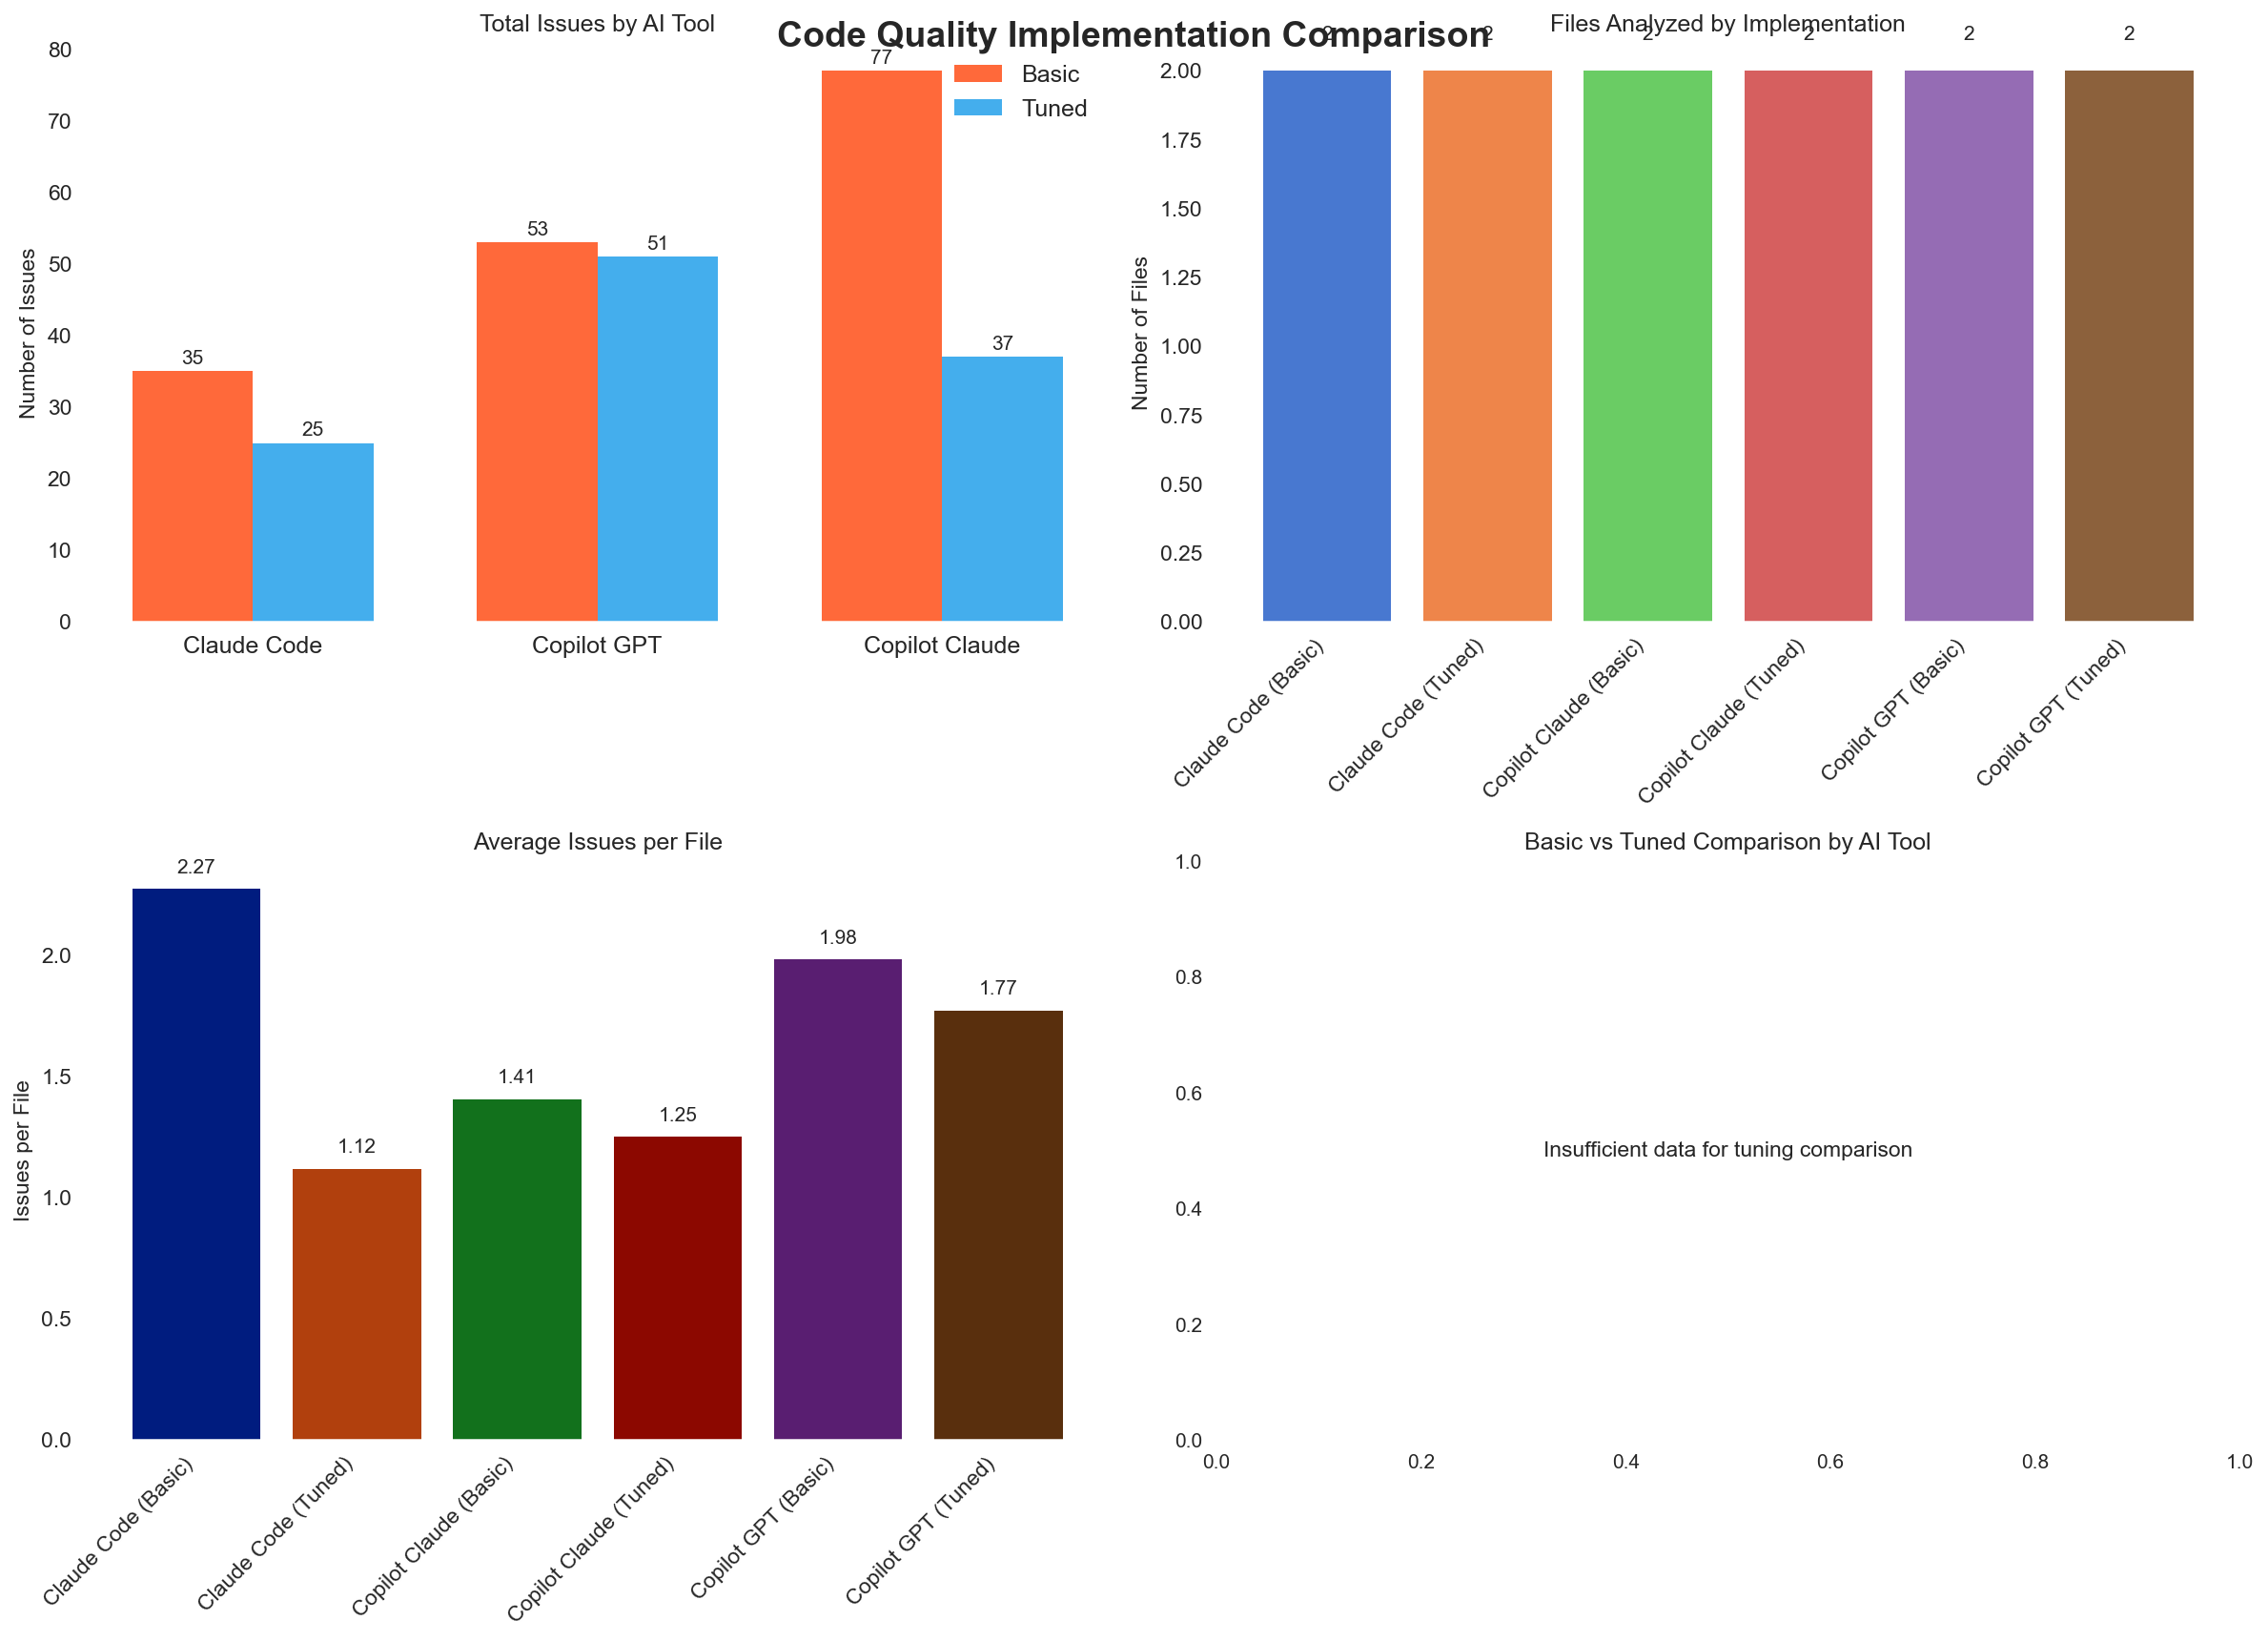

In [34]:
def create_implementation_overview():
    """Create overview visualizations comparing implementations."""
    
    if implementation_data['summary'].empty:
        print("⚠️  No summary data available for implementation comparison")
        return
    
    summary_df = implementation_data['summary']
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=150)
    fig.suptitle('Code Quality Implementation Comparison', fontsize=18, fontweight='bold', y=0.95)
    
    # Increase spacing between subplots
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    
    # 1. Total Issues by Implementation - Grouped by AI Tool
    if 'Total Issues (A excl)' in summary_df.columns:
        # Group implementations by base tool for first chart too
        tool_groups = {
            'Claude Code': {'basic': None, 'tuned': None},
            'Copilot GPT': {'basic': None, 'tuned': None},
            'Copilot Claude': {'basic': None, 'tuned': None}
        }
        
        # Extract data for each tool group
        for impl in IMPLEMENTATIONS:
            impl_data = summary_df[summary_df['implementation'] == impl]
            if not impl_data.empty:
                total_issues = impl_data['Total Issues (A excl)'].sum()
                
                # Map implementations to tool groups
                if 'claude_code' in impl:
                    tool_key = 'Claude Code'
                elif 'copilot_gpt' in impl:
                    tool_key = 'Copilot GPT'
                elif 'copilot_claude' in impl:
                    tool_key = 'Copilot Claude'
                else:
                    continue
                
                if 'with_tuning' in impl:
                    tool_groups[tool_key]['tuned'] = total_issues
                elif 'no_tuning' in impl:
                    tool_groups[tool_key]['basic'] = total_issues
        
        # Create grouped bar chart for total issues
        tools_with_data = []
        basic_values = []
        tuned_values = []
        
        for tool, data in tool_groups.items():
            if data['basic'] is not None and data['tuned'] is not None:
                tools_with_data.append(tool)
                basic_values.append(data['basic'])
                tuned_values.append(data['tuned'])
        
        if tools_with_data:
            x = np.arange(len(tools_with_data))
            width = 0.35
            
            # Use same two colors as the tuning chart
            basic_color = '#FF4409'  # Red for Basic
            tuned_color = '#159AE9'  # Teal for Tuned
            
            bars1 = axes[0, 0].bar(x - width/2, basic_values, width, 
                                  label='Basic', color=basic_color, alpha=0.8)
            bars2 = axes[0, 0].bar(x + width/2, tuned_values, width,
                                  label='Tuned', color=tuned_color, alpha=0.8)
            
            axes[0, 0].set_title('Total Issues by AI Tool')
            axes[0, 0].set_ylabel('Number of Issues')
            axes[0, 0].set_xticks(x)
            axes[0, 0].set_xticklabels(tools_with_data, fontsize=12)
            axes[0, 0].legend(fontsize=12)
            axes[0, 0].tick_params(axis='y', labelsize=11)
            
            # Add value labels on bars
            for bar in bars1:
                height = bar.get_height()
                axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                               f'{int(height)}', ha='center', va='bottom', fontsize=10)
            
            for bar in bars2:
                height = bar.get_height()
                axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                               f'{int(height)}', ha='center', va='bottom', fontsize=10)
        else:
            # Fallback to original implementation if no grouped data
            impl_totals = summary_df.groupby('display_name')['Total Issues (A excl)'].sum()
            axes[0, 0].bar(range(len(impl_totals)), impl_totals.values, 
                          color=sns.color_palette("husl", len(impl_totals)))
            axes[0, 0].set_title('Total Issues by Implementation')
            axes[0, 0].set_ylabel('Number of Issues')
            axes[0, 0].set_xticks(range(len(impl_totals)))
            axes[0, 0].set_xticklabels(impl_totals.index, rotation=45, ha='right')
            
            for i, v in enumerate(impl_totals.values):
                axes[0, 0].text(i, v + 0.5, str(v), ha='center', va='bottom')
    else:
        axes[0, 0].text(0.5, 0.5, 'No total issues data available', 
                       ha='center', va='center', transform=axes[0, 0].transAxes)
        axes[0, 0].set_title('Total Issues by Implementation')
    
    # 2. Files Analyzed by Implementation
    if 'Files Analyzed' in summary_df.columns:
        files_analyzed = summary_df.groupby('display_name')['Files Analyzed'].first()
        
        axes[0, 1].bar(range(len(files_analyzed)), files_analyzed.values,
                      color=sns.color_palette("muted", len(files_analyzed)))
        axes[0, 1].set_title('Files Analyzed by Implementation')
        axes[0, 1].set_ylabel('Number of Files')
        axes[0, 1].set_xticks(range(len(files_analyzed)))
        axes[0, 1].set_xticklabels(files_analyzed.index, rotation=45, ha='right', fontsize=11)
        axes[0, 1].tick_params(axis='y', labelsize=11)
        
        # Add value labels
        for i, v in enumerate(files_analyzed.values):
            axes[0, 1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)
    else:
        axes[0, 1].text(0.5, 0.5, 'No files analyzed data available',
                       ha='center', va='center', transform=axes[0, 1].transAxes)
        axes[0, 1].set_title('Files Analyzed by Implementation')
    
    # 3. Issues per File Ratio
    if 'Issues per File' in summary_df.columns:
        issues_per_file = summary_df.groupby('display_name')['Issues per File'].mean()
        
        axes[1, 0].bar(range(len(issues_per_file)), issues_per_file.values,
                      color=sns.color_palette("dark", len(issues_per_file)))
        axes[1, 0].set_title('Average Issues per File')
        axes[1, 0].set_ylabel('Issues per File')
        axes[1, 0].set_xticks(range(len(issues_per_file)))
        axes[1, 0].set_xticklabels(issues_per_file.index, rotation=45, ha='right', fontsize=11)
        axes[1, 0].tick_params(axis='y', labelsize=11)
        
        # Add value labels
        for i, v in enumerate(issues_per_file.values):
            axes[1, 0].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
    else:
        axes[1, 0].text(0.5, 0.5, 'No issues per file data available',
                       ha='center', va='center', transform=axes[1, 0].transAxes)
        axes[1, 0].set_title('Average Issues per File')
    
    # 4. Grouped Tuning Effect Analysis
    # Group implementations by base tool
    tool_groups = {
        'Claude Code': {'basic': None, 'tuned': None},
        'Copilot GPT': {'basic': None, 'tuned': None},
        'Copilot Claude': {'basic': None, 'tuned': None}
    }
    
    # Extract data for each tool group
    for impl in IMPLEMENTATIONS:
        if 'Total Issues (A excl)' in summary_df.columns:
            impl_data = summary_df[summary_df['implementation'] == impl]
            if not impl_data.empty:
                total_issues = impl_data['Total Issues (A excl)'].sum()
                
                # Map implementations to tool groups
                if 'claude_code' in impl:
                    tool_key = 'Claude Code'
                elif 'copilot_gpt' in impl:
                    tool_key = 'Copilot GPT'
                elif 'copilot_claude' in impl:
                    tool_key = 'Copilot Claude'
                else:
                    continue
                
                if 'with_tuning' in impl:
                    tool_groups[tool_key]['tuned'] = total_issues
                elif 'no_tuning' in impl:
                    tool_groups[tool_key]['basic'] = total_issues
    
    # Create grouped bar chart
    tools_with_data = []
    basic_values = []
    tuned_values = []
    
    for tool, data in tool_groups.items():
        if data['basic'] is not None and data['tuned'] is not None:
            tools_with_data.append(tool)
            basic_values.append(data['basic'])
            tuned_values.append(data['tuned'])
    
    if tools_with_data:
        x = np.arange(len(tools_with_data))
        width = 0.35
        
        # Use only two colors for Basic and Tuned
        basic_color = '#FF4409'  # Red for Basic
        tuned_color = '#159AE9'  # Teal for Tuned
        
        bars1 = axes[1, 1].bar(x - width/2, basic_values, width, 
                              label='Без инструкций', color=basic_color, alpha=0.8)
        bars2 = axes[1, 1].bar(x + width/2, tuned_values, width,
                              label='С Инструкциями', color=tuned_color, alpha=0.8)
        
        # axes[1, 1].set_title('Без инструкции и с инструкцией, сравнение по инструментам')


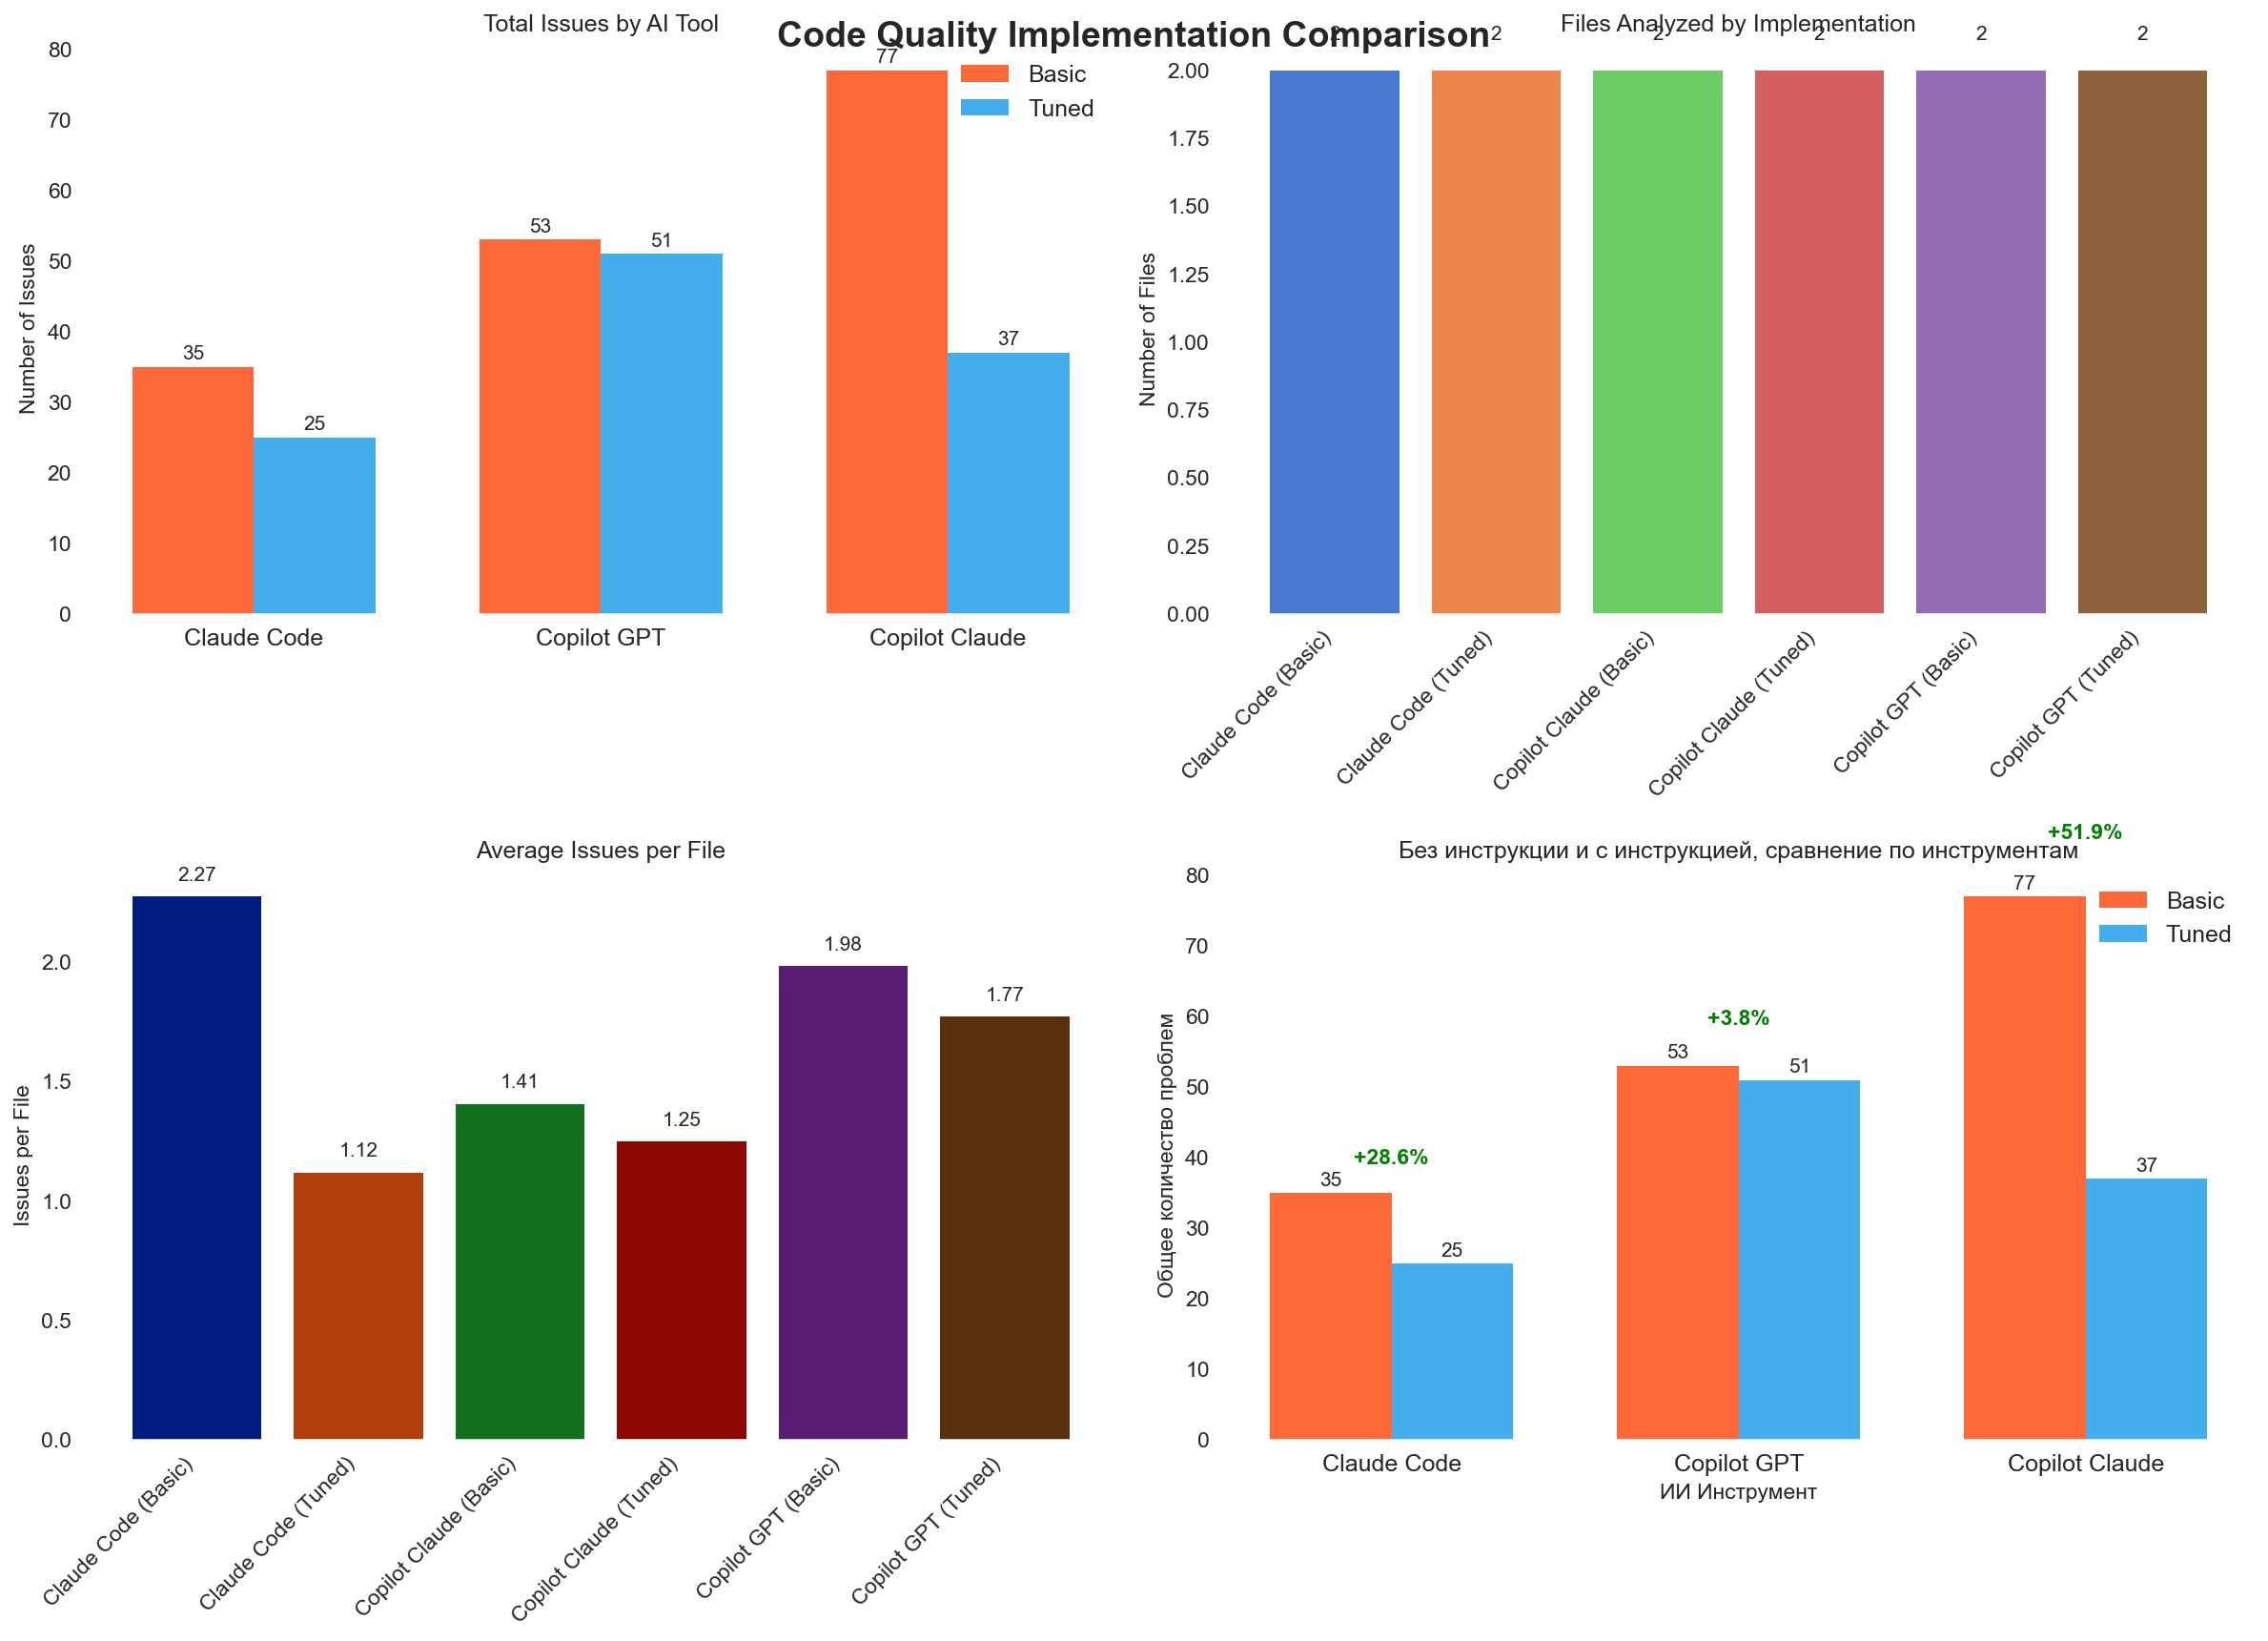

In [41]:
def create_implementation_overview():
    """Create overview visualizations comparing implementations."""
    
    if implementation_data['summary'].empty:
        print("⚠️  No summary data available for implementation comparison")
        return
    
    summary_df = implementation_data['summary']
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=150)
    fig.suptitle('Code Quality Implementation Comparison', fontsize=18, fontweight='bold', y=0.95)
    
    # Increase spacing between subplots
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    
    # 1. Total Issues by Implementation - Grouped by AI Tool
    if 'Total Issues (A excl)' in summary_df.columns:
        # Group implementations by base tool for first chart too
        tool_groups = {
            'Claude Code': {'basic': None, 'tuned': None},
            'Copilot GPT': {'basic': None, 'tuned': None},
            'Copilot Claude': {'basic': None, 'tuned': None}
        }
        
        # Extract data for each tool group
        for impl in IMPLEMENTATIONS:
            impl_data = summary_df[summary_df['implementation'] == impl]
            if not impl_data.empty:
                total_issues = impl_data['Total Issues (A excl)'].sum()
                
                # Map implementations to tool groups
                if 'claude_code' in impl:
                    tool_key = 'Claude Code'
                elif 'copilot_gpt' in impl:
                    tool_key = 'Copilot GPT'
                elif 'copilot_claude' in impl:
                    tool_key = 'Copilot Claude'
                else:
                    continue
                
                if 'with_tuning' in impl:
                    tool_groups[tool_key]['tuned'] = total_issues
                elif 'no_tuning' in impl:
                    tool_groups[tool_key]['basic'] = total_issues
        
        # Create grouped bar chart for total issues
        tools_with_data = []
        basic_values = []
        tuned_values = []
        
        for tool, data in tool_groups.items():
            if data['basic'] is not None and data['tuned'] is not None:
                tools_with_data.append(tool)
                basic_values.append(data['basic'])
                tuned_values.append(data['tuned'])
        
        if tools_with_data:
            x = np.arange(len(tools_with_data))
            width = 0.35
            
            # Use same two colors as the tuning chart
            basic_color = '#FF4409'  # Red for Basic
            tuned_color = '#159AE9'  # Teal for Tuned
            
            bars1 = axes[0, 0].bar(x - width/2, basic_values, width, 
                                  label='Basic', color=basic_color, alpha=0.8)
            bars2 = axes[0, 0].bar(x + width/2, tuned_values, width,
                                  label='Tuned', color=tuned_color, alpha=0.8)
            
            axes[0, 0].set_title('Total Issues by AI Tool')
            axes[0, 0].set_ylabel('Number of Issues')
            axes[0, 0].set_xticks(x)
            axes[0, 0].set_xticklabels(tools_with_data, fontsize=12)
            axes[0, 0].legend(fontsize=12)
            axes[0, 0].tick_params(axis='y', labelsize=11)
            
            # Add value labels on bars
            for bar in bars1:
                height = bar.get_height()
                axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                               f'{int(height)}', ha='center', va='bottom', fontsize=10)
            
            for bar in bars2:
                height = bar.get_height()
                axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                               f'{int(height)}', ha='center', va='bottom', fontsize=10)
        else:
            # Fallback to original implementation if no grouped data
            impl_totals = summary_df.groupby('display_name')['Total Issues (A excl)'].sum()
            axes[0, 0].bar(range(len(impl_totals)), impl_totals.values, 
                          color=sns.color_palette("husl", len(impl_totals)))
            axes[0, 0].set_title('Total Issues by Implementation')
            axes[0, 0].set_ylabel('Number of Issues')
            axes[0, 0].set_xticks(range(len(impl_totals)))
            axes[0, 0].set_xticklabels(impl_totals.index, rotation=45, ha='right')
            
            for i, v in enumerate(impl_totals.values):
                axes[0, 0].text(i, v + 0.5, str(v), ha='center', va='bottom')
    else:
        axes[0, 0].text(0.5, 0.5, 'No total issues data available', 
                       ha='center', va='center', transform=axes[0, 0].transAxes)
        axes[0, 0].set_title('Total Issues by Implementation')
    
    # 2. Files Analyzed by Implementation
    if 'Files Analyzed' in summary_df.columns:
        files_analyzed = summary_df.groupby('display_name')['Files Analyzed'].first()
        
        axes[0, 1].bar(range(len(files_analyzed)), files_analyzed.values,
                      color=sns.color_palette("muted", len(files_analyzed)))
        axes[0, 1].set_title('Files Analyzed by Implementation')
        axes[0, 1].set_ylabel('Number of Files')
        axes[0, 1].set_xticks(range(len(files_analyzed)))
        axes[0, 1].set_xticklabels(files_analyzed.index, rotation=45, ha='right', fontsize=11)
        axes[0, 1].tick_params(axis='y', labelsize=11)
        
        # Add value labels
        for i, v in enumerate(files_analyzed.values):
            axes[0, 1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)
    else:
        axes[0, 1].text(0.5, 0.5, 'No files analyzed data available',
                       ha='center', va='center', transform=axes[0, 1].transAxes)
        axes[0, 1].set_title('Files Analyzed by Implementation')
    
    # 3. Issues per File Ratio
    if 'Issues per File' in summary_df.columns:
        issues_per_file = summary_df.groupby('display_name')['Issues per File'].mean()
        
        axes[1, 0].bar(range(len(issues_per_file)), issues_per_file.values,
                      color=sns.color_palette("dark", len(issues_per_file)))
        axes[1, 0].set_title('Average Issues per File')
        axes[1, 0].set_ylabel('Issues per File')
        axes[1, 0].set_xticks(range(len(issues_per_file)))
        axes[1, 0].set_xticklabels(issues_per_file.index, rotation=45, ha='right', fontsize=11)
        axes[1, 0].tick_params(axis='y', labelsize=11)
        
        # Add value labels
        for i, v in enumerate(issues_per_file.values):
            axes[1, 0].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
    else:
        axes[1, 0].text(0.5, 0.5, 'No issues per file data available',
                       ha='center', va='center', transform=axes[1, 0].transAxes)
        axes[1, 0].set_title('Average Issues per File')
    
    # 4. Grouped Tuning Effect Analysis
    # Group implementations by base tool
    tool_groups = {
        'Claude Code': {'basic': None, 'tuned': None},
        'Copilot GPT': {'basic': None, 'tuned': None},
        'Copilot Claude': {'basic': None, 'tuned': None}
    }
    
    # Extract data for each tool group
    for impl in IMPLEMENTATIONS:
        if 'Total Issues (A excl)' in summary_df.columns:
            impl_data = summary_df[summary_df['implementation'] == impl]
            if not impl_data.empty:
                total_issues = impl_data['Total Issues (A excl)'].sum()
                
                # Map implementations to tool groups
                if 'claude_code' in impl:
                    tool_key = 'Claude Code'
                elif 'copilot_gpt' in impl:
                    tool_key = 'Copilot GPT'
                elif 'copilot_claude' in impl:
                    tool_key = 'Copilot Claude'
                else:
                    continue
                
                if 'with_tuning' in impl:
                    tool_groups[tool_key]['tuned'] = total_issues
                elif 'no_tuning' in impl:
                    tool_groups[tool_key]['basic'] = total_issues
    
    # Create grouped bar chart
    tools_with_data = []
    basic_values = []
    tuned_values = []
    
    for tool, data in tool_groups.items():
        if data['basic'] is not None and data['tuned'] is not None:
            tools_with_data.append(tool)
            basic_values.append(data['basic'])
            tuned_values.append(data['tuned'])
    
    if tools_with_data:
        x = np.arange(len(tools_with_data))
        width = 0.35
        
        # Use only two colors for Basic and Tuned
        basic_color = '#FF4409'  # Red for Basic
        tuned_color = '#159AE9'  # Teal for Tuned
        
        bars1 = axes[1, 1].bar(x - width/2, basic_values, width, 
                              label='Basic', color=basic_color, alpha=0.8)
        bars2 = axes[1, 1].bar(x + width/2, tuned_values, width,
                              label='Tuned', color=tuned_color, alpha=0.8)
        
        axes[1, 1].set_title('Без инструкции и с инструкцией, сравнение по инструментам')
        axes[1, 1].set_ylabel('Общее количество проблем')
        axes[1, 1].set_xlabel('ИИ Инструмент')
        axes[1, 1].set_xticks(x)
        axes[1, 1].set_xticklabels(tools_with_data, fontsize=12)
        axes[1, 1].legend(fontsize=12)
        axes[1, 1].tick_params(axis='y', labelsize=11)
        
        # Add value labels on bars
        for bar in bars1:
            height = bar.get_height()
            axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                           f'{int(height)}', ha='center', va='bottom', fontsize=10)
        
        for bar in bars2:
            height = bar.get_height()
            axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                           f'{int(height)}', ha='center', va='bottom', fontsize=10)
        
        # Calculate and display improvement percentages
        for i, tool in enumerate(tools_with_data):
            basic_val = basic_values[i]
            tuned_val = tuned_values[i]
            if basic_val > 0:
                improvement_pct = ((basic_val - tuned_val) / basic_val) * 100
                # Add improvement text above the bars
                max_height = max(basic_val, tuned_val)
                axes[1, 1].text(i, max_height + max_height * 0.1, 
                               f'{improvement_pct:+.1f}%', 
                               ha='center', va='bottom', fontweight='bold', fontsize=11,
                               color='green' if improvement_pct > 0 else 'red')
    else:
        axes[1, 1].text(0.5, 0.5, 'Insufficient data for tuning comparison',
                       ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Basic vs Tuned Comparison by AI Tool')
    
    plt.tight_layout()
    plt.show()

# Create implementation overview
create_implementation_overview()

## Generate Tool-Specific Comparison Charts

📊 Found 7 tools: bandit, ruff, mypy, radon_cc, radon_mi, flake8_wps, vulture


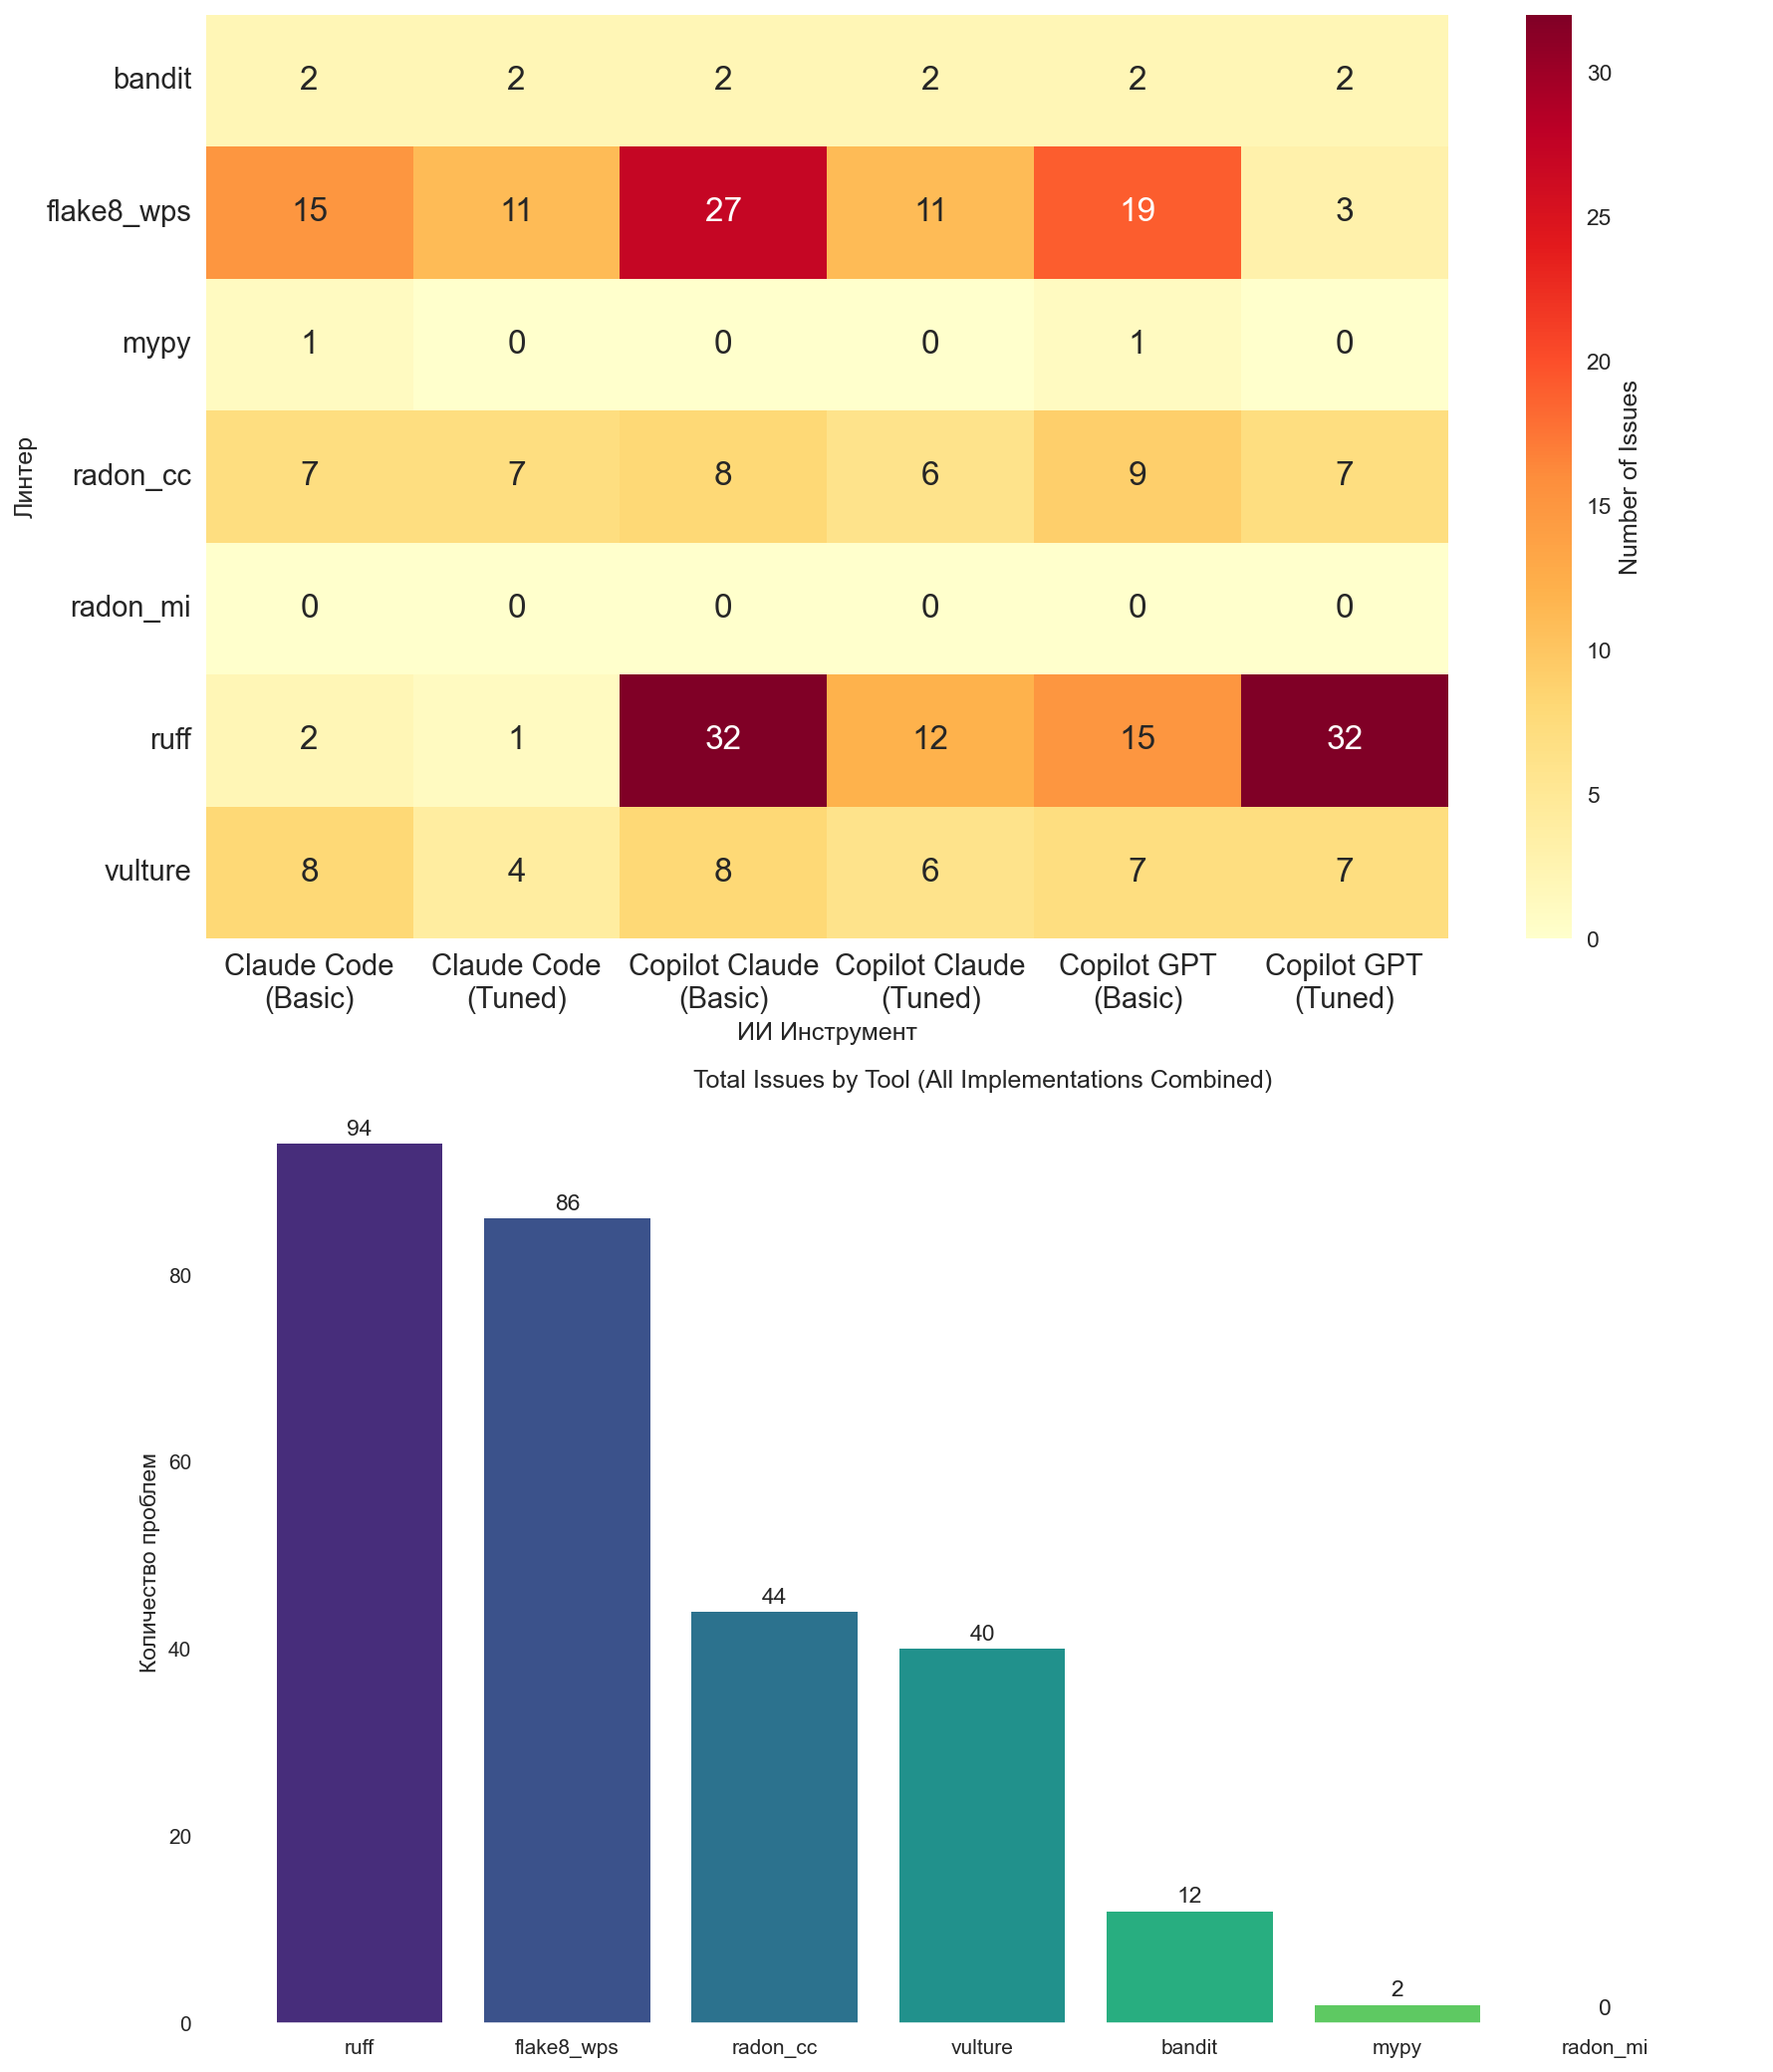

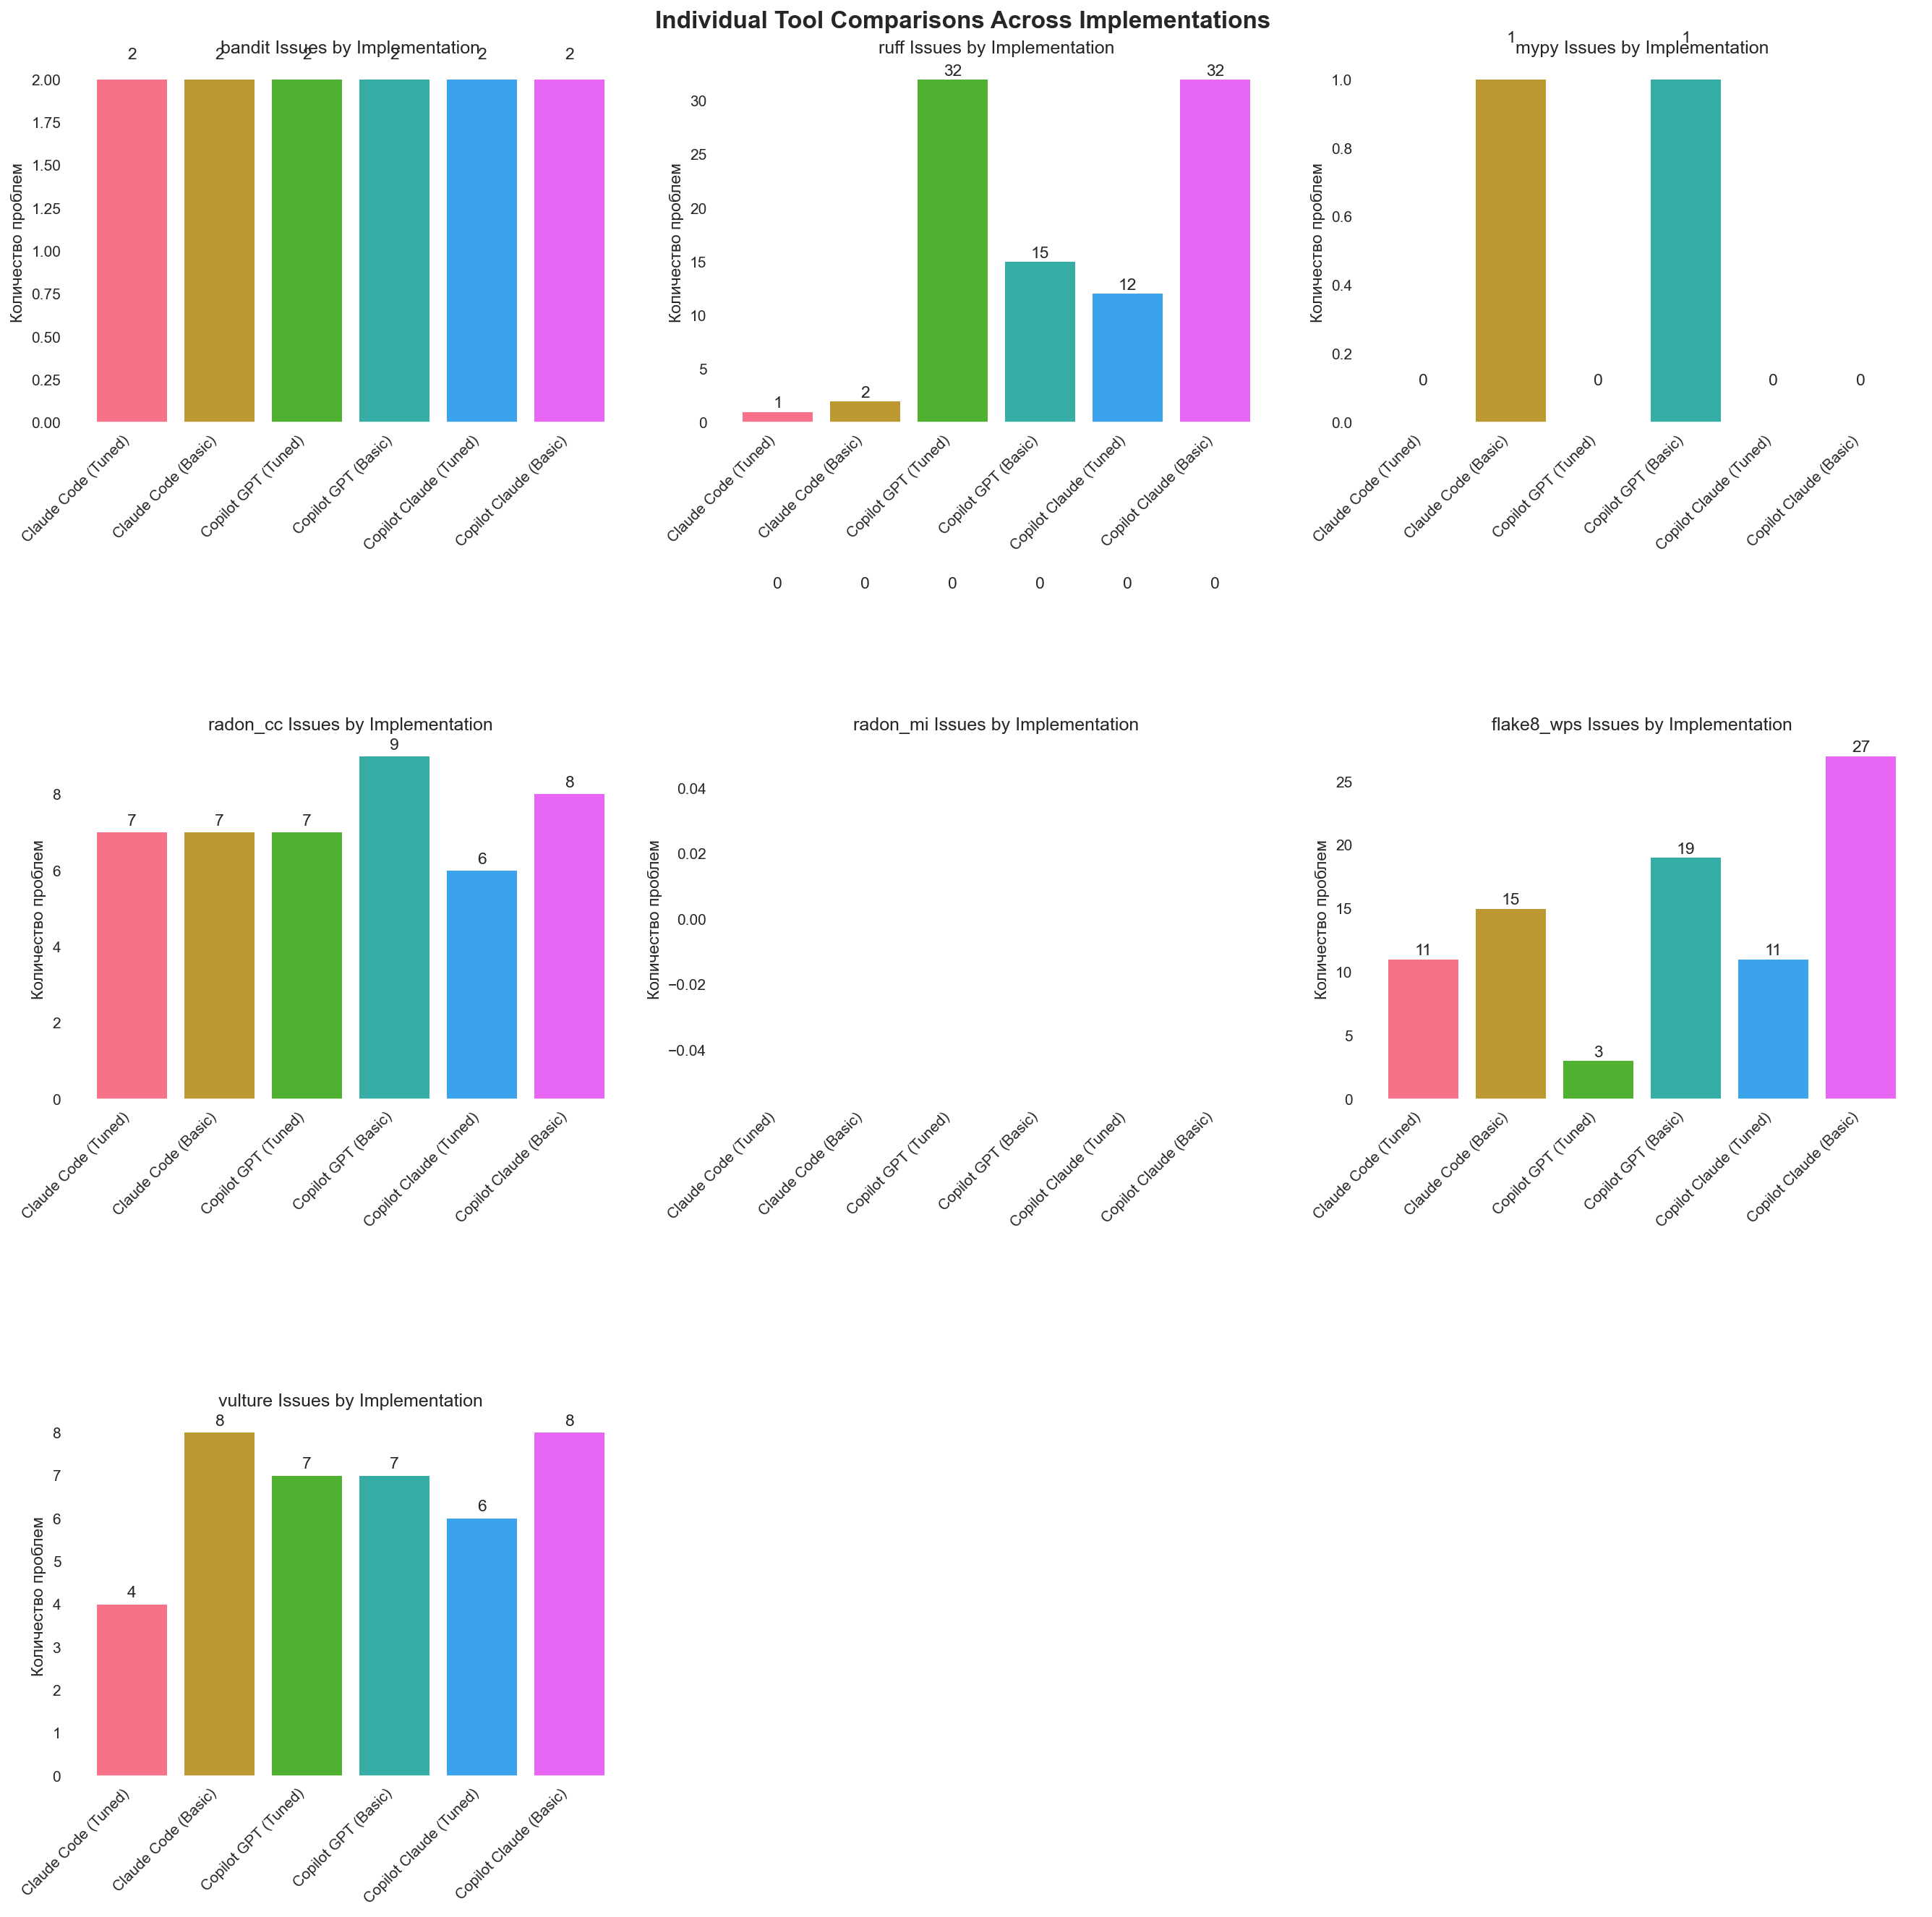

In [37]:
def create_tool_specific_comparison():
    """Create detailed comparisons for each linting tool."""
    
    if implementation_data['summary'].empty:
        print("⚠️  No summary data available for tool-specific comparison")
        return
    
    summary_df = implementation_data['summary']
    
    # Get unique tools from the data
    if 'Tool' in summary_df.columns:
        tools = summary_df['Tool'].unique()
        print(f"📊 Found {len(tools)} tools: {', '.join(tools)}")
    else:
        print("⚠️  No 'Tool' column found in summary data")
        return
    
    # Create a comprehensive heatmap
    if 'Total Issues (A excl)' in summary_df.columns:
        # Pivot data for heatmap
        heatmap_data = summary_df.pivot_table(
            index='Tool', 
            columns='display_name', 
            values='Total Issues (A excl)',
            aggfunc='sum',
            fill_value=0
        )
        
        # Wrap long implementation names for better display
        wrapped_columns = []
        for col in heatmap_data.columns:
            # Split on parentheses and wrap
            if '(' in col and ')' in col:
                parts = col.split('(')
                base_name = parts[0].strip()
                variant = '(' + parts[1]
                wrapped_columns.append(f"{base_name}\n{variant}")
            else:
                wrapped_columns.append(col)
        
        # Create figure
        fig, axes = plt.subplots(2, 1, figsize=(12, 14), dpi=150)
        
        # Increase spacing between subplots
        plt.subplots_adjust(hspace=0.4)
        
        # 1. Heatmap of issues by tool and implementation
        sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', 
                   ax=axes[0], cbar_kws={'label': 'Number of Issues'},
                   annot_kws={'fontsize': 16})
        
        axes[0].set_xlabel('ИИ Инструмент', fontsize=12)
        axes[0].set_ylabel('Линтер', fontsize=12)
        
        # Set wrapped column names and increase font sizes
        axes[0].set_xticklabels(wrapped_columns, rotation=0, ha='center', fontsize=14)
        axes[0].set_yticklabels(heatmap_data.index, rotation=0, fontsize=14)
        
        # Increase colorbar label font size
        cbar = axes[0].collections[0].colorbar
        cbar.ax.tick_params(labelsize=11)
        cbar.set_label('Number of Issues', fontsize=12)
        
        # 2. Bar chart comparing total issues per tool across all implementations
        tool_totals = summary_df.groupby('Tool')['Total Issues (A excl)'].sum().sort_values(ascending=False)
        
        bars = axes[1].bar(range(len(tool_totals)), tool_totals.values,
                          color=sns.color_palette("viridis", len(tool_totals)))
        axes[1].set_title('Total Issues by Tool (All Implementations Combined)')
        axes[1].set_ylabel('Количество проблем')
        axes[1].set_xticks(range(len(tool_totals)))
        axes[1].set_xticklabels(tool_totals.index, rotation=0, ha='center')
        
        # Add value labels on bars
        for i, (bar, value) in enumerate(zip(bars, tool_totals.values)):
            axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                        str(value), ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        # Create individual tool comparison charts
        n_tools = len(tools)
        if n_tools > 0:
            cols = min(3, n_tools)
            rows = (n_tools + cols - 1) // cols
            
            fig, axes = plt.subplots(rows, cols, figsize=(18, 6*rows), dpi=150)
            fig.suptitle('Individual Tool Comparisons Across Implementations', 
                         fontsize=16, fontweight='bold', y=0.98)
            
            # Increase spacing for individual tool charts
            plt.subplots_adjust(hspace=0.5, wspace=0.3)
            
            if rows == 1 and cols == 1:
                axes = [axes]
            elif rows == 1:
                axes = axes
            else:
                axes = axes.flatten()
            
            for i, tool in enumerate(tools):
                tool_data = summary_df[summary_df['Tool'] == tool]
                
                if not tool_data.empty and i < len(axes):
                    implementations = tool_data['display_name'].values
                    issues = tool_data['Total Issues (A excl)'].values
                    
                    bars = axes[i].bar(range(len(implementations)), issues,
                                     color=sns.color_palette("husl", len(implementations)))
                    axes[i].set_title(f'{tool} Issues by Implementation')
                    axes[i].set_ylabel('Количество проблем')
                    axes[i].set_xticks(range(len(implementations)))
                    axes[i].set_xticklabels(implementations, rotation=45, ha='right')
                    
                    # Add value labels
                    for bar, value in zip(bars, issues):
                        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                                   str(value), ha='center', va='bottom')
            
            # Hide unused subplots
            for i in range(len(tools), len(axes)):
                axes[i].set_visible(False)
            
            plt.tight_layout()
            plt.show()
    
    else:
        print("⚠️  No 'Total Issues (A excl)' column found for tool comparison")

# Create tool-specific comparison
create_tool_specific_comparison()

📊 Analyzing complexity data for 6 implementations
Total functions analyzed: 1119


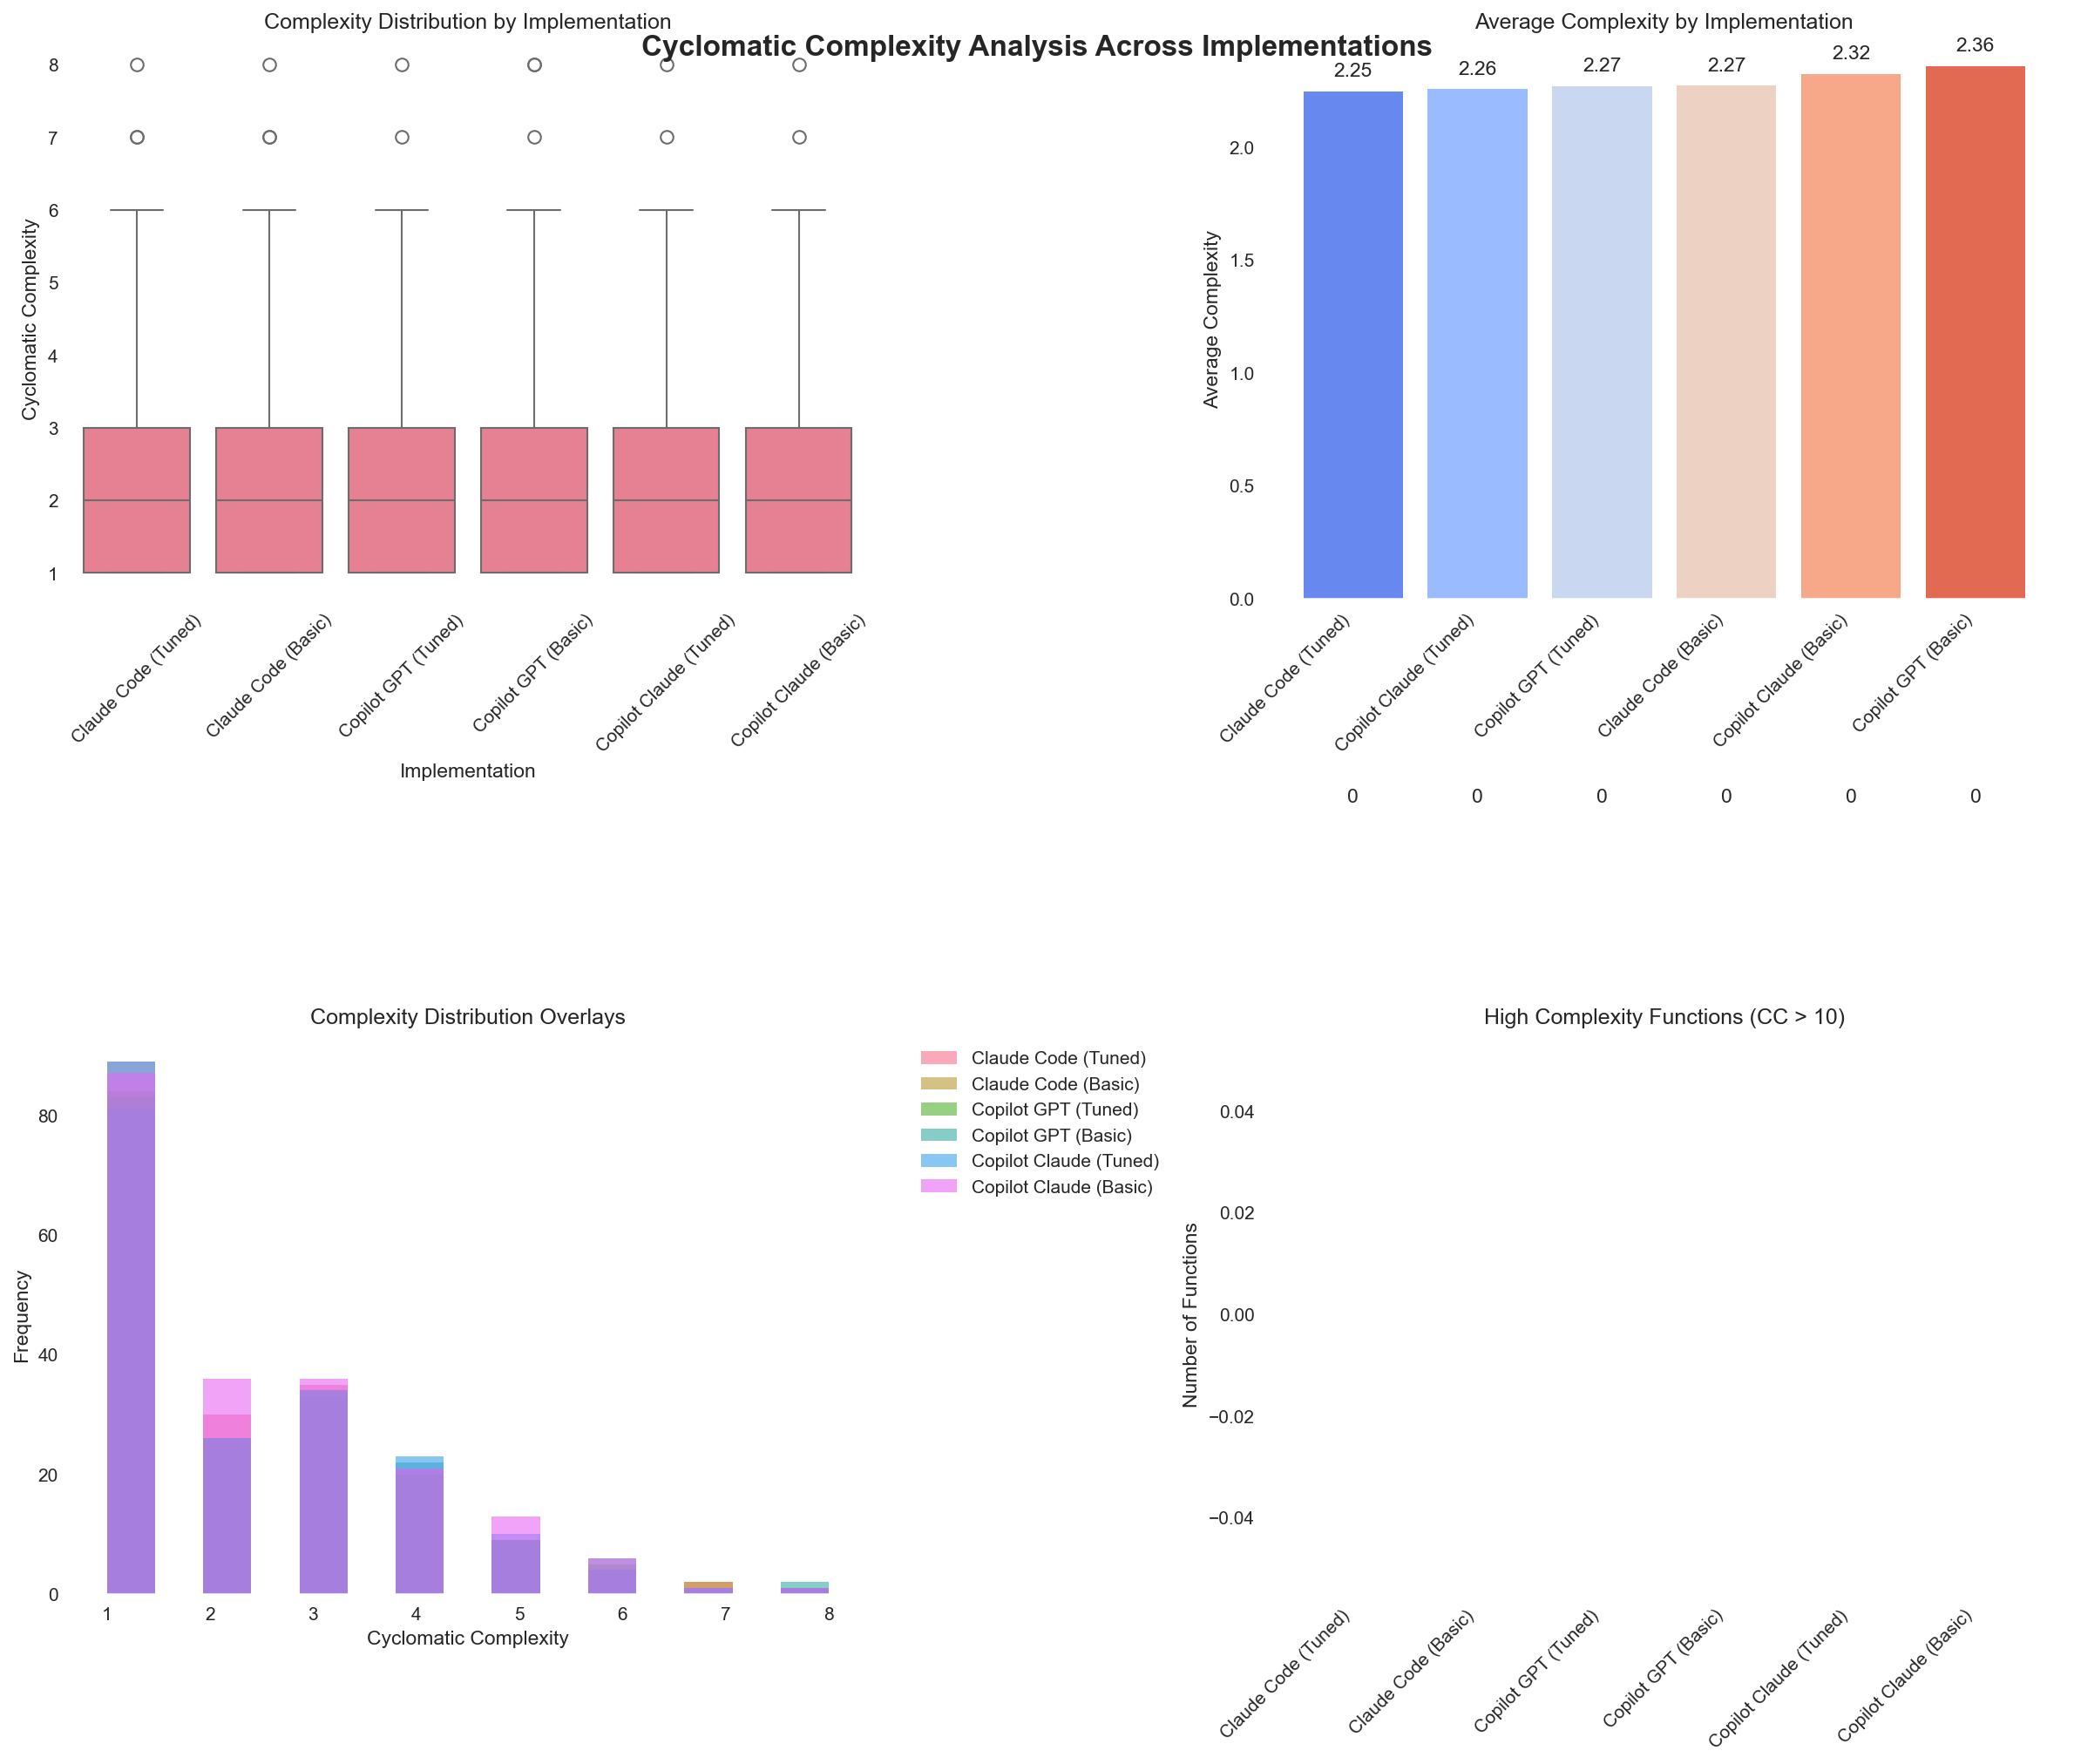


📋 Complexity Statistics Summary:
                        count  mean  median   std  min  max
display_name                                               
Claude Code (Basic)       180  2.27     2.0  1.52    1    8
Claude Code (Tuned)       191  2.25     2.0  1.50    1    8
Copilot Claude (Basic)    201  2.32     2.0  1.52    1    8
Copilot Claude (Tuned)    188  2.26     2.0  1.49    1    8
Copilot GPT (Basic)       181  2.36     2.0  1.59    1    8
Copilot GPT (Tuned)       178  2.27     2.0  1.51    1    8

🏆 Best Average Complexity: Claude Code (Tuned) (2.25)
🚨 Highest Average Complexity: Copilot GPT (Basic) (2.36)
📈 Potential Improvement: 0.11 complexity points


In [17]:
def create_complexity_analysis():
    """Create visualizations for cyclomatic complexity comparison."""
    
    if implementation_data['complexity'].empty:
        print("⚠️  No complexity data available for analysis")
        return
    
    complexity_df = implementation_data['complexity']
    
    if 'complexity' not in complexity_df.columns:
        print("⚠️  No 'complexity' column found in complexity data")
        return
    
    print(f"📊 Analyzing complexity data for {complexity_df['implementation'].nunique()} implementations")
    print(f"Total functions analyzed: {len(complexity_df)}")
    
    # Create comprehensive complexity analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 14), dpi=150)
    fig.suptitle('Cyclomatic Complexity Analysis Across Implementations', 
                 fontsize=16, fontweight='bold', y=0.95)
    
    # Increase spacing between subplots
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    
    # 1. Box plot of complexity by implementation
    sns.boxplot(data=complexity_df, x='display_name', y='complexity', ax=axes[0, 0])
    axes[0, 0].set_title('Complexity Distribution by Implementation')
    axes[0, 0].set_xlabel('Implementation')
    axes[0, 0].set_ylabel('Cyclomatic Complexity')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Average complexity comparison
    avg_complexity = complexity_df.groupby('display_name')['complexity'].mean().sort_values()
    
    bars = axes[0, 1].bar(range(len(avg_complexity)), avg_complexity.values,
                         color=sns.color_palette("coolwarm", len(avg_complexity)))
    axes[0, 1].set_title('Average Complexity by Implementation')
    axes[0, 1].set_ylabel('Average Complexity')
    axes[0, 1].set_xticks(range(len(avg_complexity)))
    axes[0, 1].set_xticklabels(avg_complexity.index, rotation=45, ha='right')
    
    # Add value labels
    for bar, value in zip(bars, avg_complexity.values):
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                       f'{value:.2f}', ha='center', va='bottom')
    
    # 3. Complexity distribution histograms
    implementations = complexity_df['display_name'].unique()
    colors = sns.color_palette("husl", len(implementations))
    
    for impl, color in zip(implementations, colors):
        impl_data = complexity_df[complexity_df['display_name'] == impl]['complexity']
        axes[1, 0].hist(impl_data, alpha=0.6, label=impl, bins=15, color=color)
    
    axes[1, 0].set_title('Complexity Distribution Overlays')
    axes[1, 0].set_xlabel('Cyclomatic Complexity')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 4. High complexity functions count (complexity > 10)
    high_complexity_counts = complexity_df[complexity_df['complexity'] > 10].groupby('display_name').size()
    high_complexity_counts = high_complexity_counts.reindex(implementations, fill_value=0)
    
    bars = axes[1, 1].bar(range(len(high_complexity_counts)), high_complexity_counts.values,
                         color=sns.color_palette("Reds", len(high_complexity_counts)))
    axes[1, 1].set_title('High Complexity Functions (CC > 10)')
    axes[1, 1].set_ylabel('Number of Functions')
    axes[1, 1].set_xticks(range(len(high_complexity_counts)))
    axes[1, 1].set_xticklabels(high_complexity_counts.index, rotation=45, ha='right')
    
    # Add value labels
    for bar, value in zip(bars, high_complexity_counts.values):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                       str(value), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Print complexity statistics
    print("\n📋 Complexity Statistics Summary:")
    complexity_stats = complexity_df.groupby('display_name')['complexity'].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)
    print(complexity_stats)
    
    # Identify best and worst performers
    best_impl = avg_complexity.index[0]
    worst_impl = avg_complexity.index[-1]
    
    print(f"\n🏆 Best Average Complexity: {best_impl} ({avg_complexity.iloc[0]:.2f})")
    print(f"🚨 Highest Average Complexity: {worst_impl} ({avg_complexity.iloc[-1]:.2f})")
    
    improvement = avg_complexity.iloc[-1] - avg_complexity.iloc[0]
    print(f"📈 Potential Improvement: {improvement:.2f} complexity points")

# Create complexity analysis
create_complexity_analysis()

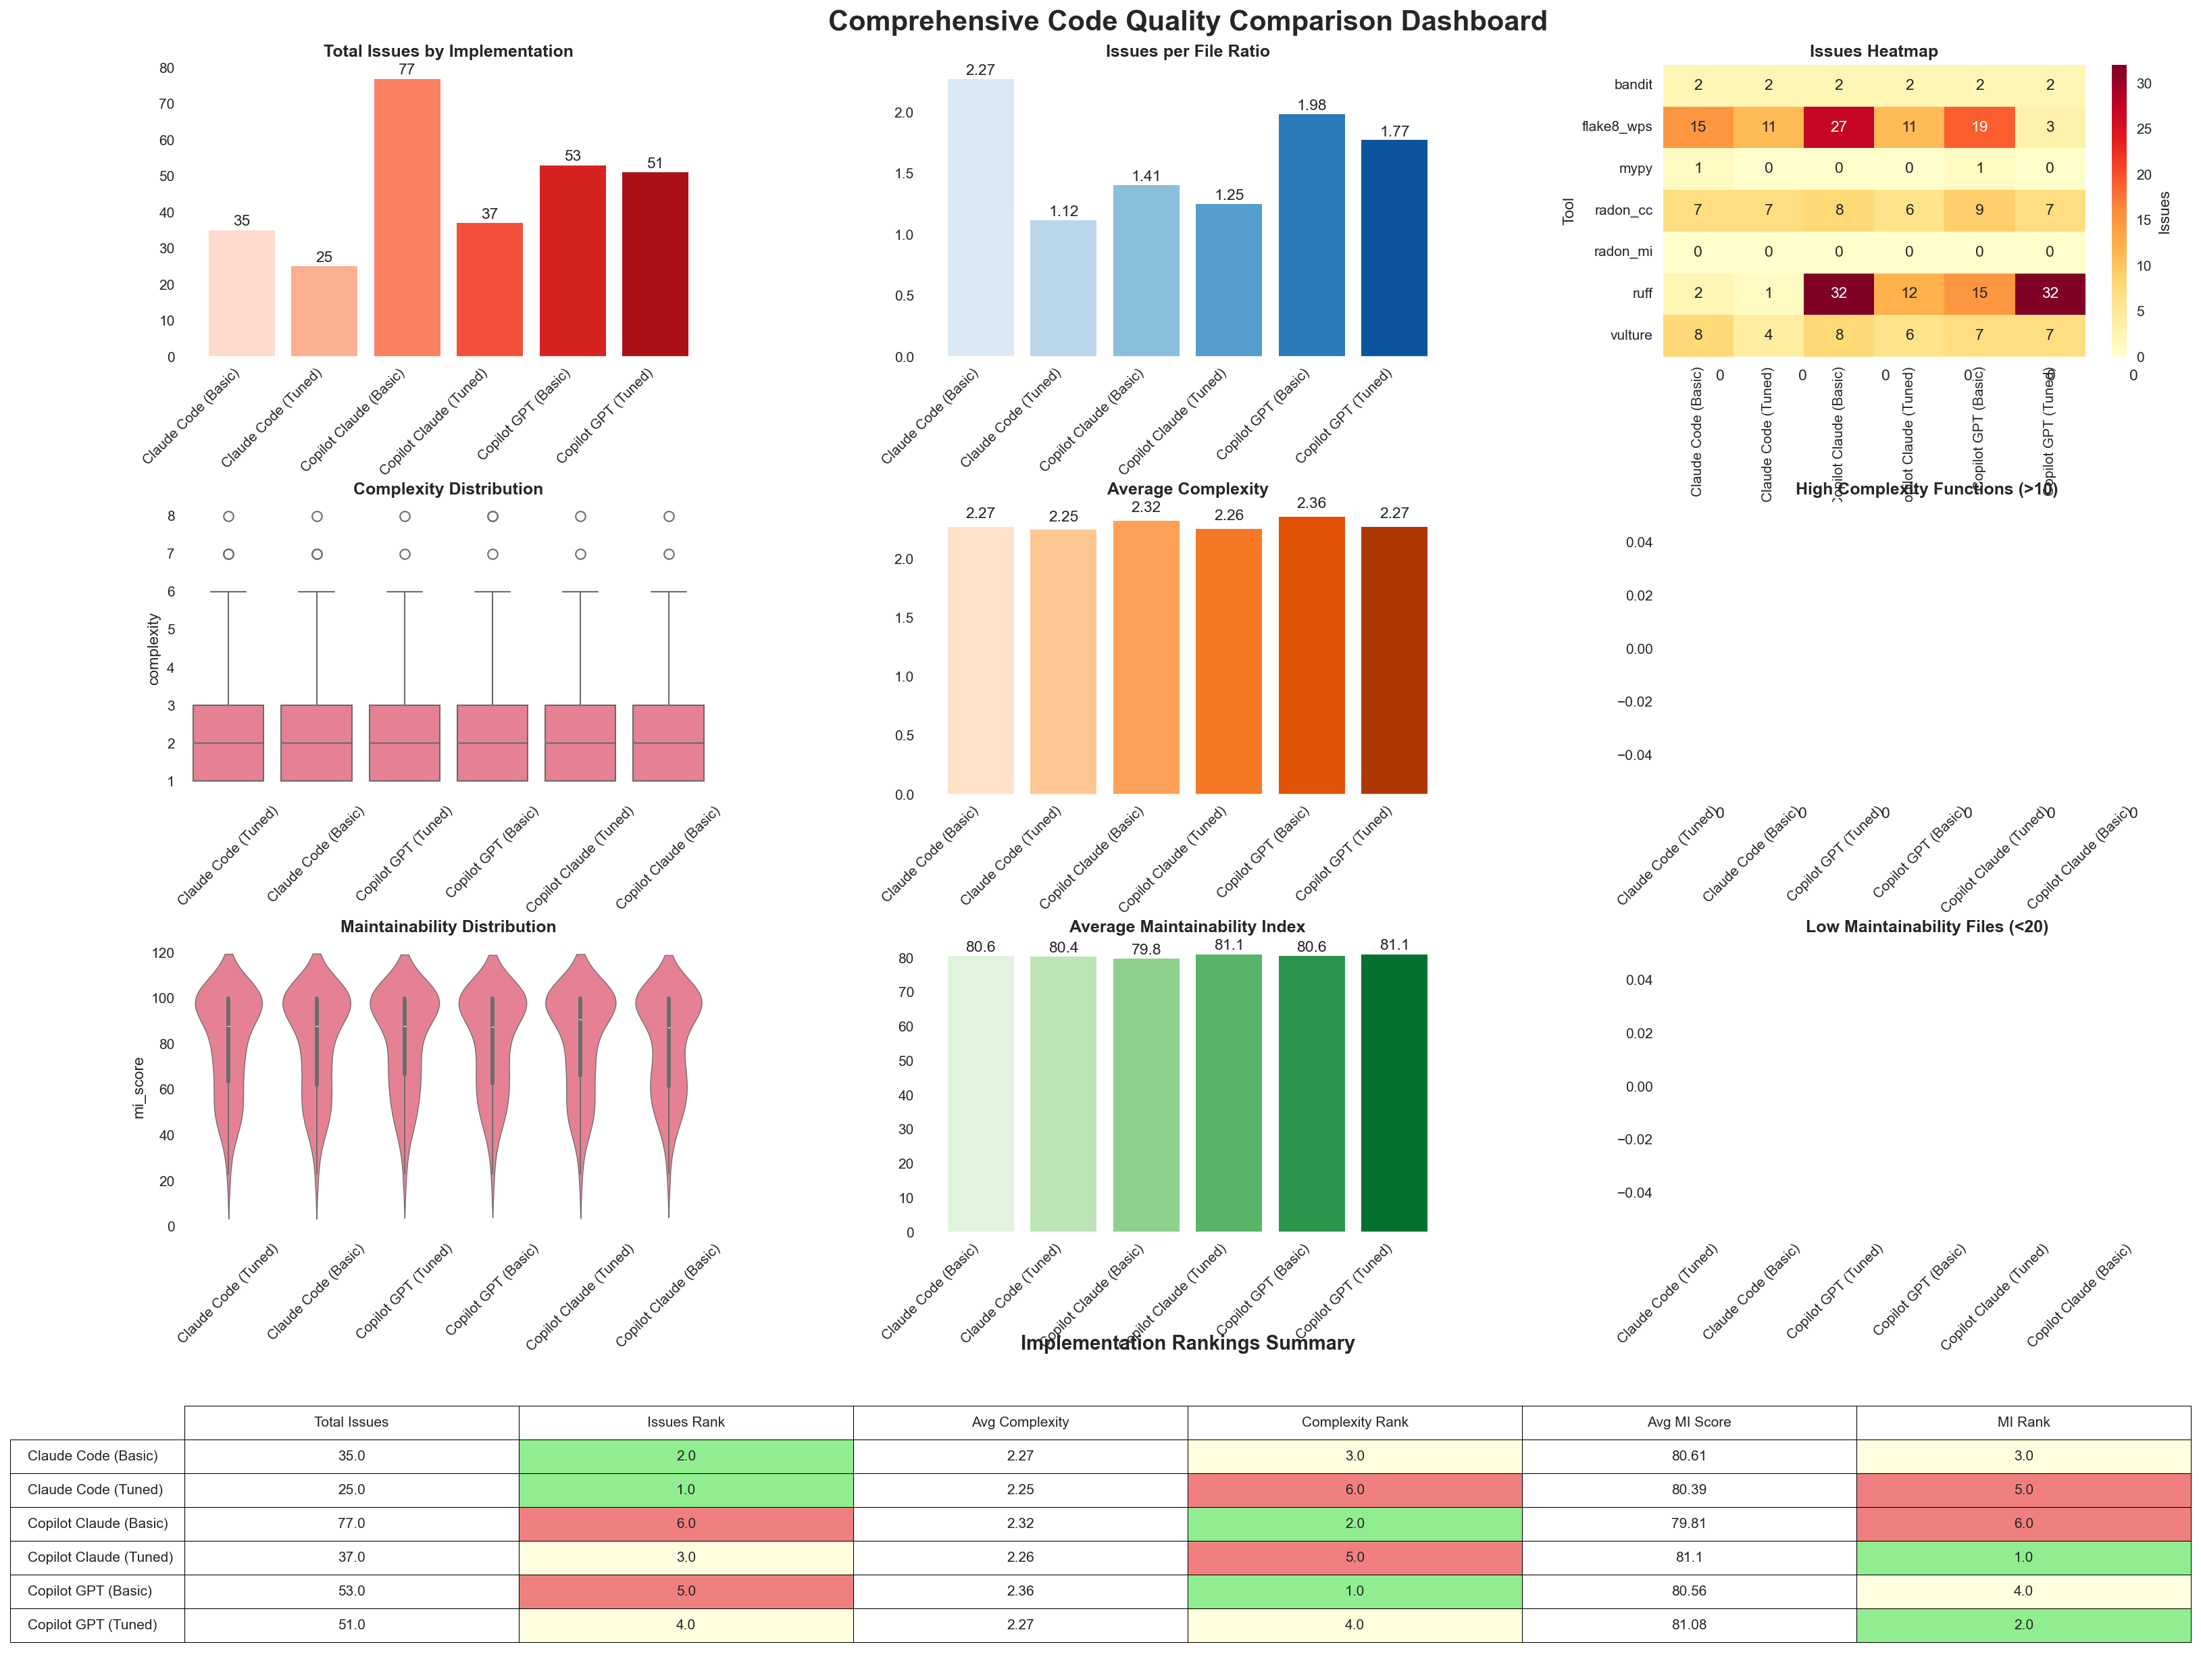


COMPREHENSIVE COMPARISON SUMMARY

📊 Overall Performance Rankings:
                        Total Issues  Issues Rank  Avg Complexity  \
Implementation                                                      
Claude Code (Basic)               35          2.0            2.27   
Claude Code (Tuned)               25          1.0            2.25   
Copilot Claude (Basic)            77          6.0            2.32   
Copilot Claude (Tuned)            37          3.0            2.26   
Copilot GPT (Basic)               53          5.0            2.36   
Copilot GPT (Tuned)               51          4.0            2.27   

                        Complexity Rank  Avg MI Score  MI Rank  
Implementation                                                  
Claude Code (Basic)                 3.0         80.61      3.0  
Claude Code (Tuned)                 6.0         80.39      5.0  
Copilot Claude (Basic)              2.0         79.81      6.0  
Copilot Claude (Tuned)              5.0         81.10  

In [18]:
def create_comprehensive_dashboard():
    """Create a comprehensive dashboard showing all metrics in one view."""
    
    # Check data availability
    has_summary = not implementation_data['summary'].empty
    has_complexity = not implementation_data['complexity'].empty
    has_maintainability = not implementation_data['maintainability'].empty
    
    if not any([has_summary, has_complexity, has_maintainability]):
        print("⚠️  No data available for comprehensive dashboard")
        return
    
    # Create a large dashboard figure
    fig = plt.figure(figsize=(22, 18), dpi=150)
    fig.suptitle('Comprehensive Code Quality Comparison Dashboard', 
                 fontsize=20, fontweight='bold', y=0.96)
    
    # Define grid layout (4 rows, 3 columns) with increased spacing
    gs = fig.add_gridspec(4, 3, hspace=0.5, wspace=0.4, top=0.93, bottom=0.05, left=0.05, right=0.95)
    
    # Row 1: Overall metrics
    if has_summary:
        summary_df = implementation_data['summary']
        
        # Total issues comparison
        ax1 = fig.add_subplot(gs[0, 0])
        if 'Total Issues (A excl)' in summary_df.columns:
            impl_totals = summary_df.groupby('display_name')['Total Issues (A excl)'].sum()
            bars = ax1.bar(range(len(impl_totals)), impl_totals.values,
                          color=sns.color_palette("Reds", len(impl_totals)))
            ax1.set_title('Total Issues by Implementation', fontweight='bold')
            ax1.set_xticks(range(len(impl_totals)))
            ax1.set_xticklabels(impl_totals.index, rotation=45, ha='right')
            
            # Add value labels
            for bar, value in zip(bars, impl_totals.values):
                ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                        str(value), ha='center', va='bottom')
        
        # Issues per file
        ax2 = fig.add_subplot(gs[0, 1])
        if 'Issues per File' in summary_df.columns:
            issues_per_file = summary_df.groupby('display_name')['Issues per File'].mean()
            bars = ax2.bar(range(len(issues_per_file)), issues_per_file.values,
                          color=sns.color_palette("Blues", len(issues_per_file)))
            ax2.set_title('Issues per File Ratio', fontweight='bold')
            ax2.set_xticks(range(len(issues_per_file)))
            ax2.set_xticklabels(issues_per_file.index, rotation=45, ha='right')
            
            for bar, value in zip(bars, issues_per_file.values):
                ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{value:.2f}', ha='center', va='bottom')
        
        # Tool heatmap
        ax3 = fig.add_subplot(gs[0, 2])
        if 'Tool' in summary_df.columns and 'Total Issues (A excl)' in summary_df.columns:
            heatmap_data = summary_df.pivot_table(
                index='Tool', columns='display_name', 
                values='Total Issues (A excl)', aggfunc='sum', fill_value=0
            )
            sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', ax=ax3,
                       cbar_kws={'label': 'Issues'})
            ax3.set_title('Issues Heatmap', fontweight='bold')
    
    # Row 2: Complexity analysis
    if has_complexity:
        complexity_df = implementation_data['complexity']
        
        # Complexity box plot
        ax4 = fig.add_subplot(gs[1, 0])
        if 'complexity' in complexity_df.columns:
            sns.boxplot(data=complexity_df, x='display_name', y='complexity', ax=ax4)
            ax4.set_title('Complexity Distribution', fontweight='bold')
            ax4.set_xlabel('')
            ax4.tick_params(axis='x', rotation=45)
        
        # Average complexity
        ax5 = fig.add_subplot(gs[1, 1])
        if 'complexity' in complexity_df.columns:
            avg_complexity = complexity_df.groupby('display_name')['complexity'].mean()
            bars = ax5.bar(range(len(avg_complexity)), avg_complexity.values,
                          color=sns.color_palette("Oranges", len(avg_complexity)))
            ax5.set_title('Average Complexity', fontweight='bold')
            ax5.set_xticks(range(len(avg_complexity)))
            ax5.set_xticklabels(avg_complexity.index, rotation=45, ha='right')
            
            for bar, value in zip(bars, avg_complexity.values):
                ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                        f'{value:.2f}', ha='center', va='bottom')
        
        # High complexity functions
        ax6 = fig.add_subplot(gs[1, 2])
        if 'complexity' in complexity_df.columns:
            high_complex = complexity_df[complexity_df['complexity'] > 10].groupby('display_name').size()
            implementations = complexity_df['display_name'].unique()
            high_complex = high_complex.reindex(implementations, fill_value=0)
            
            bars = ax6.bar(range(len(high_complex)), high_complex.values,
                          color=sns.color_palette("Reds", len(high_complex)))
            ax6.set_title('High Complexity Functions (>10)', fontweight='bold')
            ax6.set_xticks(range(len(high_complex)))
            ax6.set_xticklabels(high_complex.index, rotation=45, ha='right')
            
            for bar, value in zip(bars, high_complex.values):
                ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                        str(value), ha='center', va='bottom')
    
    # Row 3: Maintainability analysis
    if has_maintainability:
        maintainability_df = implementation_data['maintainability']
        
        # Maintainability violin plot
        ax7 = fig.add_subplot(gs[2, 0])
        if 'mi_score' in maintainability_df.columns:
            sns.violinplot(data=maintainability_df, x='display_name', y='mi_score', ax=ax7)
            ax7.set_title('Maintainability Distribution', fontweight='bold')
            ax7.set_xlabel('')
            ax7.tick_params(axis='x', rotation=45)
        
        # Average maintainability
        ax8 = fig.add_subplot(gs[2, 1])
        if 'mi_score' in maintainability_df.columns:
            avg_mi = maintainability_df.groupby('display_name')['mi_score'].mean()
            bars = ax8.bar(range(len(avg_mi)), avg_mi.values,
                          color=sns.color_palette("Greens", len(avg_mi)))
            ax8.set_title('Average Maintainability Index', fontweight='bold')
            ax8.set_xticks(range(len(avg_mi)))
            ax8.set_xticklabels(avg_mi.index, rotation=45, ha='right')
            
            for bar, value in zip(bars, avg_mi.values):
                ax8.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                        f'{value:.1f}', ha='center', va='bottom')
        
        # Low maintainability files
        ax9 = fig.add_subplot(gs[2, 2])
        if 'mi_score' in maintainability_df.columns:
            low_mi = maintainability_df[maintainability_df['mi_score'] < 20].groupby('display_name').size()
            implementations = maintainability_df['display_name'].unique()
            low_mi = low_mi.reindex(implementations, fill_value=0)
            
            bars = ax9.bar(range(len(low_mi)), low_mi.values,
                          color=sns.color_palette("Oranges", len(low_mi)))
            ax9.set_title('Low Maintainability Files (<20)', fontweight='bold')
            ax9.set_xticks(range(len(low_mi)))
            ax9.set_xticklabels(low_mi.index, rotation=45, ha='right')
            
            for bar, value in zip(bars, low_mi.values):
                ax9.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                        str(value), ha='center', va='bottom')
    
    # Row 4: Summary metrics and rankings
    ax10 = fig.add_subplot(gs[3, :])
    
    # Create overall ranking if we have data
    ranking_data = []
    
    if has_summary and 'Total Issues (A excl)' in implementation_data['summary'].columns:
        total_issues = implementation_data['summary'].groupby('display_name')['Total Issues (A excl)'].sum()
        for impl, issues in total_issues.items():
            ranking_data.append({'Implementation': impl, 'Total Issues': issues, 'Issues Rank': total_issues.rank().loc[impl]})
    
    if has_complexity and 'complexity' in implementation_data['complexity'].columns:
        avg_complexity = implementation_data['complexity'].groupby('display_name')['complexity'].mean()
        for impl, complexity in avg_complexity.items():
            existing = next((item for item in ranking_data if item['Implementation'] == impl), None)
            if existing:
                existing['Avg Complexity'] = complexity
                existing['Complexity Rank'] = avg_complexity.rank(ascending=False).loc[impl]
            else:
                ranking_data.append({'Implementation': impl, 'Avg Complexity': complexity, 'Complexity Rank': avg_complexity.rank(ascending=False).loc[impl]})
    
    if has_maintainability and 'mi_score' in implementation_data['maintainability'].columns:
        avg_mi = implementation_data['maintainability'].groupby('display_name')['mi_score'].mean()
        for impl, mi_score in avg_mi.items():
            existing = next((item for item in ranking_data if item['Implementation'] == impl), None)
            if existing:
                existing['Avg MI Score'] = mi_score
                existing['MI Rank'] = avg_mi.rank(ascending=False).loc[impl]
            else:
                ranking_data.append({'Implementation': impl, 'Avg MI Score': mi_score, 'MI Rank': avg_mi.rank(ascending=False).loc[impl]})
    
    if ranking_data:
        ranking_df = pd.DataFrame(ranking_data).set_index('Implementation')
        
        # Create a summary table visualization
        ax10.axis('tight')
        ax10.axis('off')
        
        # Prepare table data for display
        table_data = ranking_df.round(2)
        table = ax10.table(cellText=table_data.values,
                          rowLabels=table_data.index,
                          colLabels=table_data.columns,
                          cellLoc='center',
                          loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 2)
        
        # Color code the table based on rankings
        for i in range(len(table_data)):
            for j, col in enumerate(table_data.columns):
                if 'Rank' in col:
                    rank_value = table_data.iloc[i, j]
                    if pd.notna(rank_value):
                        if rank_value <= 2:
                            color = 'lightgreen'
                        elif rank_value <= 4:
                            color = 'lightyellow'
                        else:
                            color = 'lightcoral'
                        table[(i+1, j)].set_facecolor(color)
        
        ax10.set_title('Implementation Rankings Summary', fontweight='bold', fontsize=14, pad=20)
    else:
        ax10.text(0.5, 0.5, 'No data available for rankings', 
                 ha='center', va='center', transform=ax10.transAxes, fontsize=14)
        ax10.set_title('Implementation Rankings Summary', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*80)
    print("COMPREHENSIVE COMPARISON SUMMARY")
    print("="*80)
    
    if ranking_data:
        print("\n📊 Overall Performance Rankings:")
        summary_df = pd.DataFrame(ranking_data).set_index('Implementation')
        print(summary_df.round(2))
        
        # Calculate overall score if we have multiple metrics
        if len(summary_df.columns) > 1:
            rank_cols = [col for col in summary_df.columns if 'Rank' in col]
            if len(rank_cols) >= 2:
                summary_df['Overall Score'] = summary_df[rank_cols].mean(axis=1)
                best_overall = summary_df['Overall Score'].idxmin()
                print(f"\n🏆 Best Overall Implementation: {best_overall}")
                print(f"   Overall Score: {summary_df.loc[best_overall, 'Overall Score']:.2f}")

# Create comprehensive dashboard
create_comprehensive_dashboard()

## Export Comparison Results

In [19]:
def export_comparison_results():
    """Export comparison results and generate summary report."""
    
    export_dir = Path("code_quality_comparison/results")
    export_dir.mkdir(exist_ok=True)
    
    print(f"📁 Exporting results to: {export_dir.absolute()}")
    
    # 1. Export aggregated summaries
    if not implementation_data['summary'].empty:
        summary_export = implementation_data['summary'].copy()
        summary_file = export_dir / "implementation_summary_comparison.csv"
        summary_export.to_csv(summary_file, index=False)
        print(f"✅ Exported summary comparison: {summary_file}")
    
    # 2. Export complexity analysis
    if not implementation_data['complexity'].empty:
        complexity_stats = implementation_data['complexity'].groupby(['implementation', 'display_name'])['complexity'].agg([
            'count', 'mean', 'median', 'std', 'min', 'max'
        ]).round(3)
        
        complexity_file = export_dir / "complexity_comparison.csv"
        complexity_stats.to_csv(complexity_file)
        print(f"✅ Exported complexity comparison: {complexity_file}")
    
    # 3. Export maintainability analysis
    if not implementation_data['maintainability'].empty:
        maintainability_stats = implementation_data['maintainability'].groupby(['implementation', 'display_name'])['mi_score'].agg([
            'count', 'mean', 'median', 'std', 'min', 'max'
        ]).round(3)
        
        maintainability_file = export_dir / "maintainability_comparison.csv"
        maintainability_stats.to_csv(maintainability_file)
        print(f"✅ Exported maintainability comparison: {maintainability_file}")
    
    # 4. Create comprehensive ranking
    ranking_data = []
    
    # Collect metrics for ranking
    if not implementation_data['summary'].empty and 'Total Issues (A excl)' in implementation_data['summary'].columns:
        total_issues = implementation_data['summary'].groupby('display_name')['Total Issues (A excl)'].sum()
        for impl, issues in total_issues.items():
            ranking_data.append({
                'Implementation': impl,
                'Total_Issues': issues,
                'Issues_Rank': total_issues.rank().loc[impl]
            })
    
    if not implementation_data['complexity'].empty and 'complexity' in implementation_data['complexity'].columns:
        avg_complexity = implementation_data['complexity'].groupby('display_name')['complexity'].mean()
        for impl, complexity in avg_complexity.items():
            existing = next((item for item in ranking_data if item['Implementation'] == impl), None)
            if existing:
                existing['Avg_Complexity'] = complexity
                existing['Complexity_Rank'] = avg_complexity.rank(ascending=False).loc[impl]
            else:
                ranking_data.append({
                    'Implementation': impl,
                    'Avg_Complexity': complexity,
                    'Complexity_Rank': avg_complexity.rank(ascending=False).loc[impl]
                })
    
    if not implementation_data['maintainability'].empty and 'mi_score' in implementation_data['maintainability'].columns:
        avg_mi = implementation_data['maintainability'].groupby('display_name')['mi_score'].mean()
        for impl, mi_score in avg_mi.items():
            existing = next((item for item in ranking_data if item['Implementation'] == impl), None)
            if existing:
                existing['Avg_MI_Score'] = mi_score
                existing['MI_Rank'] = avg_mi.rank(ascending=False).loc[impl]
            else:
                ranking_data.append({
                    'Implementation': impl,
                    'Avg_MI_Score': mi_score,
                    'MI_Rank': avg_mi.rank(ascending=False).loc[impl]
                })
    
    if ranking_data:
        ranking_df = pd.DataFrame(ranking_data)
        
        # Calculate overall ranking if we have multiple rank columns
        rank_cols = [col for col in ranking_df.columns if 'Rank' in col]
        if len(rank_cols) >= 2:
            ranking_df['Overall_Rank'] = ranking_df[rank_cols].mean(axis=1)
            ranking_df = ranking_df.sort_values('Overall_Rank')
        
        ranking_file = export_dir / "final_rankings.csv"
        ranking_df.to_csv(ranking_file, index=False)
        print(f"✅ Exported final rankings: {ranking_file}")
    
    # 5. Generate summary report
    report_file = export_dir / "comparison_report.md"
    
    with open(report_file, 'w') as f:
        f.write("# Code Quality Implementation Comparison Report\n\n")
        f.write(f"Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
        
        f.write("## Executive Summary\n\n")
        f.write(f"This report compares code quality metrics across {len(IMPLEMENTATIONS)} AI implementations:\n\n")
        
        for impl in IMPLEMENTATIONS:
            f.write(f"- {DISPLAY_NAMES[impl]}\n")
        
        f.write("\n## Key Findings\n\n")
        
        # Summary statistics
        if not implementation_data['summary'].empty:
            total_issues = implementation_data['summary'].groupby('display_name')['Total Issues (A excl)'].sum()
            best_issues = total_issues.idxmin()
            worst_issues = total_issues.idxmax()
            
            f.write(f"### Linting Issues\n")
            f.write(f"- **Best performer**: {best_issues} ({total_issues.loc[best_issues]} total issues)\n")
            f.write(f"- **Needs improvement**: {worst_issues} ({total_issues.loc[worst_issues]} total issues)\n")
            f.write(f"- **Issue range**: {total_issues.min()} - {total_issues.max()} issues\n\n")
        
        if not implementation_data['complexity'].empty:
            avg_complexity = implementation_data['complexity'].groupby('display_name')['complexity'].mean()
            best_complexity = avg_complexity.idxmin()
            worst_complexity = avg_complexity.idxmax()
            
            f.write(f"### Cyclomatic Complexity\n")
            f.write(f"- **Lowest complexity**: {best_complexity} ({avg_complexity.loc[best_complexity]:.2f} average)\n")
            f.write(f"- **Highest complexity**: {worst_complexity} ({avg_complexity.loc[worst_complexity]:.2f} average)\n")
            f.write(f"- **Complexity range**: {avg_complexity.min():.2f} - {avg_complexity.max():.2f}\n\n")
        
        if not implementation_data['maintainability'].empty:
            avg_mi = implementation_data['maintainability'].groupby('display_name')['mi_score'].mean()
            best_mi = avg_mi.idxmax()
            worst_mi = avg_mi.idxmin()
            
            f.write(f"### Maintainability Index\n")
            f.write(f"- **Most maintainable**: {best_mi} ({avg_mi.loc[best_mi]:.1f} average MI)\n")
            f.write(f"- **Least maintainable**: {worst_mi} ({avg_mi.loc[worst_mi]:.1f} average MI)\n")
            f.write(f"- **MI range**: {avg_mi.min():.1f} - {avg_mi.max():.1f}\n\n")
        
        f.write("## Recommendations\n\n")
        f.write("Based on the analysis, consider the following:\n\n")
        f.write("1. **Focus on the best-performing implementation** for future development\n")
        f.write("2. **Analyze patterns** in high-performing implementations\n")
        f.write("3. **Apply tuning techniques** from successful configurations\n")
        f.write("4. **Address specific tool violations** identified in the analysis\n\n")
        
        if ranking_data:
            f.write("## Final Rankings\n\n")
            ranking_df_sorted = pd.DataFrame(ranking_data).sort_values('Overall_Rank' if 'Overall_Rank' in pd.DataFrame(ranking_data).columns else 'Implementation')
            f.write(ranking_df_sorted.to_markdown(index=False))
        
        f.write("\n\n## Data Files\n\n")
        f.write("The following files contain detailed comparison data:\n\n")
        f.write("- `implementation_summary_comparison.csv`: Tool-level summary data\n")
        f.write("- `complexity_comparison.csv`: Cyclomatic complexity statistics\n")
        f.write("- `maintainability_comparison.csv`: Maintainability index statistics\n")
        f.write("- `final_rankings.csv`: Overall implementation rankings\n")
    
    print(f"✅ Generated comparison report: {report_file}")
    
    print(f"\n🎯 Export Summary:")
    print(f"   📁 Results directory: {export_dir}")
    print(f"   📊 Files exported: {len(list(export_dir.glob('*.csv')))} CSV files")
    print(f"   📄 Report generated: comparison_report.md")
    print(f"\n✅ All comparison results exported successfully!")

# Export results
export_comparison_results()

📁 Exporting results to: /Users/somen/Zavodi/opensource/fastapi-moscow-python-demo/code_quality_comparison/results
✅ Exported summary comparison: code_quality_comparison/results/implementation_summary_comparison.csv
✅ Exported complexity comparison: code_quality_comparison/results/complexity_comparison.csv
✅ Exported maintainability comparison: code_quality_comparison/results/maintainability_comparison.csv
✅ Exported final rankings: code_quality_comparison/results/final_rankings.csv
✅ Generated comparison report: code_quality_comparison/results/comparison_report.md

🎯 Export Summary:
   📁 Results directory: code_quality_comparison/results
   📊 Files exported: 4 CSV files
   📄 Report generated: comparison_report.md

✅ All comparison results exported successfully!
